In [ ]:
# M1 -> Cleaning, tidying and visualizations
# M2 -> Feature Engineering and pipeline
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import numpy as np
from numpy import unique
from numpy import where
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.neighbors import LocalOutlierFactor


## Reading the data

In [ ]:
root_path_happiness = 'Data/Happiness_Dataset'
world_happiness_2015_df = pd.read_csv('2015.csv')
world_happiness_2016_df = pd.read_csv('2016.csv')
world_happiness_2017_df = pd.read_csv('2017.csv')
world_happiness_2018_df = pd.read_csv('2018.csv')
world_happiness_2019_df = pd.read_csv('2019.csv')

In [ ]:
print(world_happiness_2015_df.columns.tolist(), "2015")
print()
print(world_happiness_2016_df.columns.tolist(),"2016")
print()
print(world_happiness_2017_df.columns.tolist(),"2017") 
print()
print(world_happiness_2018_df.columns.tolist(),"2018")
print()
print(world_happiness_2019_df.columns.tolist(),"2019")

['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'] 2015

['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'] 2016

['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual'] 2017

['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'] 2018

['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support',

We notice the columns names needs to be changed, So we will change it according to this:

### 2015 : 
- 'Family' -> 'Social support'
- 'Health (Life Expectancy)' -> 'Healthy life expectancy'
- 'Freedom'->  'Freedom to make life choices'
### 2016 : 
- 'Family' -> 'Social support'
- 'Health (Life Expectancy)' -> 'Healthy life expectancy'
- 'Freedom'->  'Freedom to make life choices'
### 2017 : 
- 'Happiness.Rank' -> 'Happiness Score'
- 'Family' -> 'Social support'
- "Happiness.Score" -> 'Happiness Score'
- 'Economy..GDP.per.Capita.' -> 'Economy (GDP per Capita)'
- 'Health..Life.Expectancy.' -> 'Healthy life expectancy'
- 'Freedom'->  'Freedom to make life choices'
- 'Trust..Government.Corruption.' -> 'Trust (Government Corruption)'
- 'Dystopia.Residual'-> 'Dystopia Residual'
### 2018 : 
- 'Score' -> 'Happiness Score'
- 'GDP per capita' -> 'Economy (GDP per Capita)'
- 'Perceptions of corruption' -> 'Trust (Government Corruption)'
- 'Overall rank' -> 'Happiness Rank'
### 2019 : 
- 'Score' -> 'Happiness Score'
- 'GDP per capita' -> 'Economy (GDP per Capita)'
- 'Perceptions of corruption' -> 'Trust (Government Corruption)'
- 'Overall rank' -> 'Happiness Rank'


In [ ]:
world_happiness_2015_df = world_happiness_2015_df.rename(columns={'Family': 'Social support','Health (Life Expectancy)':'Healthy life expectancy','Freedom':'Freedom to make life choices'})
world_happiness_2016_df = world_happiness_2016_df.rename(columns={'Family': 'Social support','Health (Life Expectancy)':'Healthy life expectancy','Freedom':'Freedom to make life choices'})
world_happiness_2017_df = world_happiness_2017_df.rename(columns={'Happiness.Rank' : 'Happiness Rank','Family':'Social support',"Happiness.Score" : 'Happiness Score','Health..Life.Expectancy.': 'Healthy life expectancy','Economy..GDP.per.Capita.': 'Economy (GDP per Capita)', 'Freedom':  'Freedom to make life choices', 'Trust..Government.Corruption.' : 'Trust (Government Corruption)', 'Dystopia.Residual': 'Dystopia Residual'})
world_happiness_2018_df = world_happiness_2018_df.rename(columns={"Country or region": "Country","Score": "Happiness Score", 'GDP per capita' :'Economy (GDP per Capita)','Perceptions of corruption' : 'Trust (Government Corruption)', 'Overall rank' : 'Happiness Rank'})
world_happiness_2019_df = world_happiness_2019_df.rename(columns={"Country or region": "Country","Score": "Happiness Score", 'GDP per capita' :'Economy (GDP per Capita)','Perceptions of corruption' : 'Trust (Government Corruption)', 'Overall rank' : 'Happiness Rank'})

After renaming the columns, We explore the data by counting the number of null values in each column


In [ ]:
print(world_happiness_2015_df.isnull().sum())
world_happiness_2015_df.head()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Social support                   0
Healthy life expectancy          0
Freedom to make life choices     0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
print(world_happiness_2016_df.isnull().sum())
world_happiness_2016_df.head()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Social support                   0
Healthy life expectancy          0
Freedom to make life choices     0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [ ]:
print(world_happiness_2017_df.isnull().sum())
world_happiness_2017_df.head()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Whisker.high                     0
Whisker.low                      0
Economy (GDP per Capita)         0
Social support                   0
Healthy life expectancy          0
Freedom to make life choices     0
Generosity                       0
Trust (Government Corruption)    0
Dystopia Residual                0
dtype: int64


,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [ ]:
print(world_happiness_2018_df.isnull().sum())
world_happiness_2018_df

Happiness Rank                   0
Country                          0
Happiness Score                  0
Economy (GDP per Capita)         0
Social support                   0
Healthy life expectancy          0
Freedom to make life choices     0
Generosity                       0
Trust (Government Corruption)    1
dtype: int64


,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption)
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [ ]:
print(world_happiness_2019_df.isnull().sum())
world_happiness_2019_df

Happiness Rank                   0
Country                          0
Happiness Score                  0
Economy (GDP per Capita)         0
Social support                   0
Healthy life expectancy          0
Freedom to make life choices     0
Generosity                       0
Trust (Government Corruption)    0
dtype: int64


,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption)
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


There's no null values in the datasets, excpet one null value in 2018.

In [ ]:
world_happiness_2018_df[world_happiness_2018_df['Trust (Government Corruption)'].isnull()]

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption)
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


After exploring the records values, we found that it will be approprite to replace the null with 0, for the following reasons:
- If you added the attributes that contribute to the happiness score, you will get a number less than the actual score by 2, which is the case already with this record
- The records are sorted, replacing the null with zero will preserve this

In [ ]:
# Repllace the null with zero
world_happiness_2018_df['Trust (Government Corruption)'].replace(np.nan,0 , inplace=True)

## Clustering
We will create clusters for the data for convenince
The clusters will depend on the happiness score

We used K-means method for clustring and The Elbow Method to determine the best number for k

## Helper Methods

In [ ]:
# get the number of k approprite for kmean clusters
def find_k(data):
    columns=data.columns.values
    i=np.where(columns == "Happiness Score")[0][0]
    X = data.iloc[:, i:].values
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    return plt.show()

In [ ]:
# k-means clustering
def create_clusters(data,k):
    # define dataset
    columns=data.columns.values
    i=np.where(columns == "Happiness Score")[0][0]
    X = data.iloc[:, i:].values
    # define the model
    model = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    # fit the model
    model.fit(X)
    # assign a cluster to each example
    y_kmeans = model.predict(X)
    clusters = pd.DataFrame(y_kmeans)
    clusters.columns = ["Cluster"] 
    newdata=pd.concat([data, clusters], axis=1)
    return newdata

In [ ]:
def display_clusters(data):
    columns=data.columns.values
    i=np.where(columns == "Happiness Score")[0][0]
    values= data.iloc[:, i:].values
    # retrieve unique clusters
    y_kmeans=data.iloc[:,-1:]
    clusters = unique(y_kmeans)
    columns=data.iloc[:, i:-1].columns.values
    # create scatter plot for samples from each cluster
    for column in range(1,len(columns)):
        for cluster in clusters:
            # get row indexes for samples with this cluster
            row_ix = where(y_kmeans == cluster)
            # create scatter of these samples
            plt.scatter(values[row_ix, 0], values[row_ix, column])
        # show the plot
        plt.title(columns[column])
        plt.xlabel(columns[0])
        plt.ylabel(columns[column])
        plt.show()
        print()

## 2015

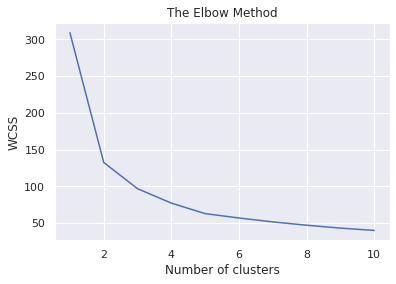

In [ ]:
find_k(world_happiness_2015_df)

We notice the best number of k is 3.

In [ ]:
clustered_2015=create_clusters(world_happiness_2015_df,3)
clustered_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,0
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,0
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,0
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,0


and then displaying the data after clustring

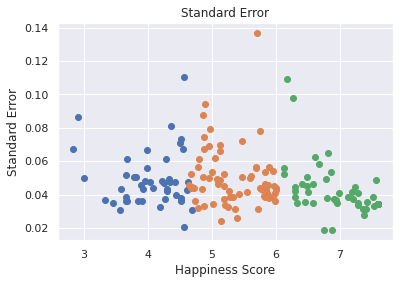

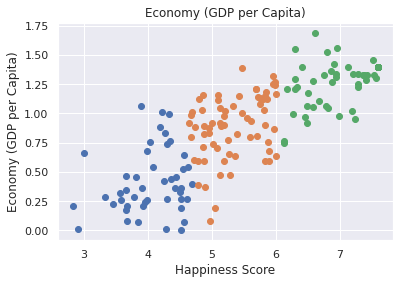

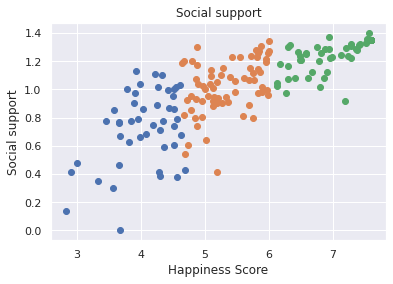

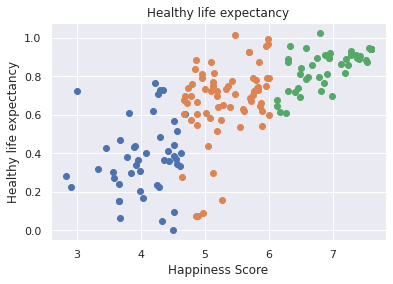

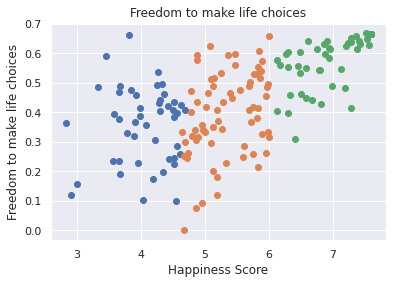

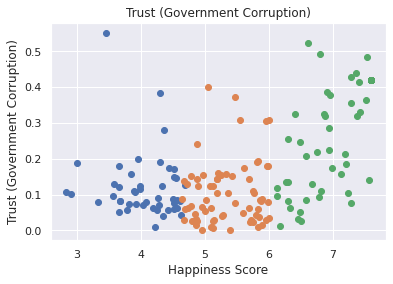

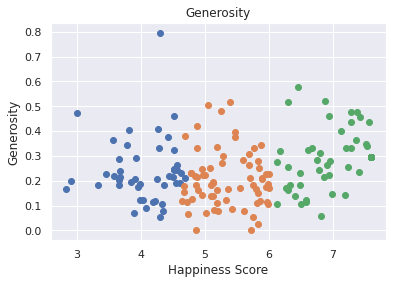

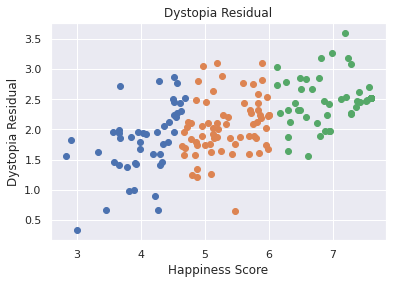

In [ ]:
display_clusters(clustered_2015)

## 2016

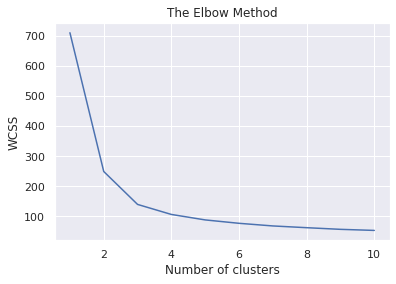

In [ ]:
find_k(world_happiness_2016_df)

We notice the best number of k is 3.

In [ ]:
clustered_2016=create_clusters(world_happiness_2016_df,3)
clustered_2016

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,0
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,0
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,0
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,0


and then displaying the data after clustring

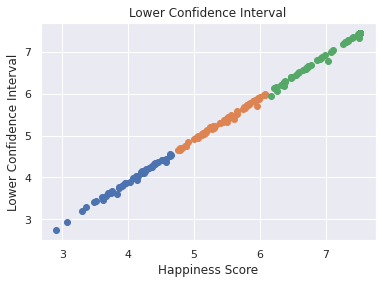

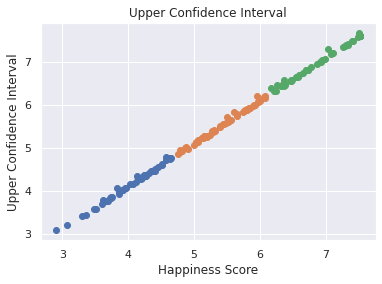

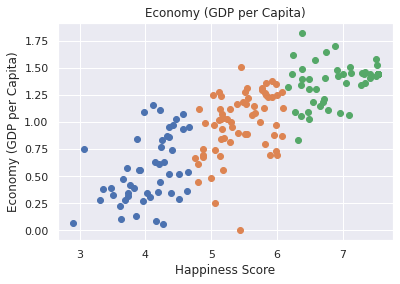

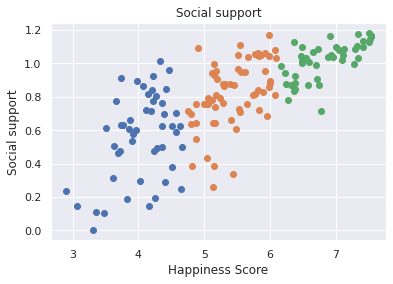

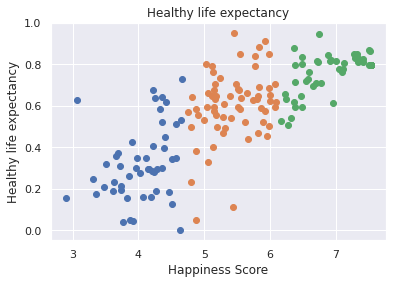

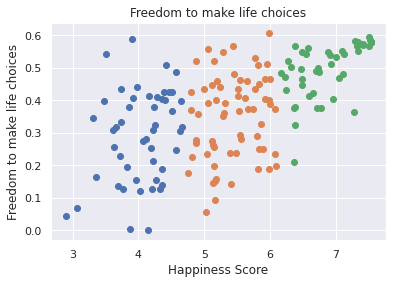

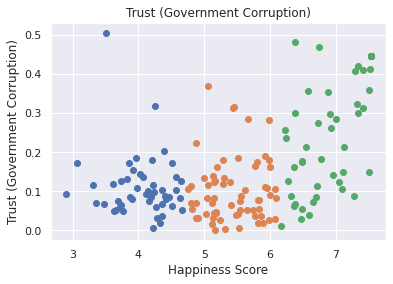

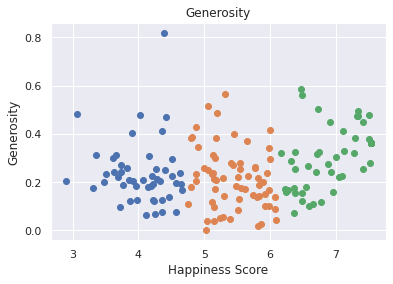

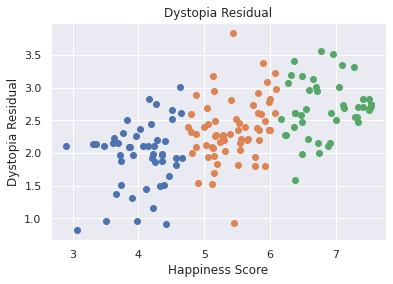

In [ ]:
display_clusters(clustered_2016)

## 2017

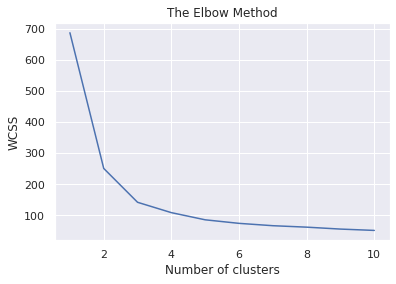

In [ ]:
find_k(world_happiness_2017_df)

We notice the best number of k is 3.

In [ ]:
clustered_2017=create_clusters(world_happiness_2017_df,3)
clustered_2017

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Dystopia Residual,Cluster
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,1
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,1
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,1
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,1


and then displaying the data after clustring

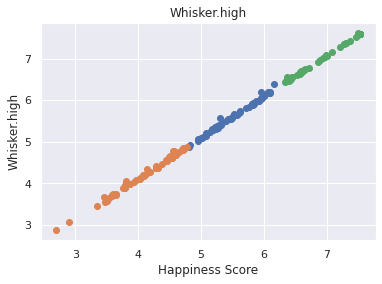

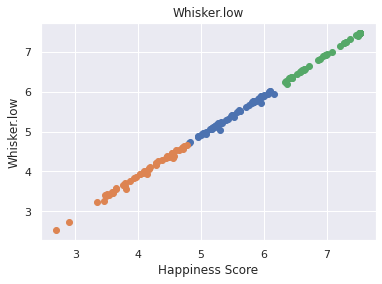

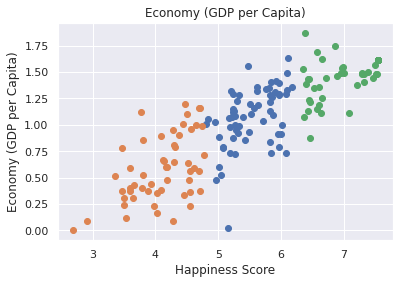

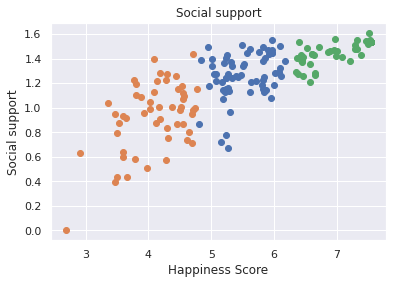

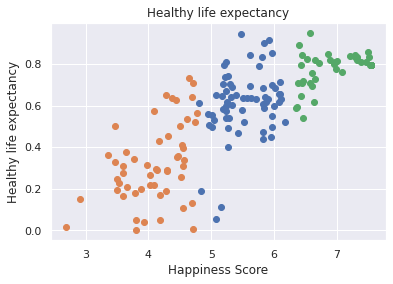

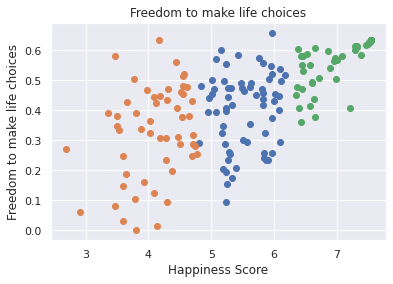

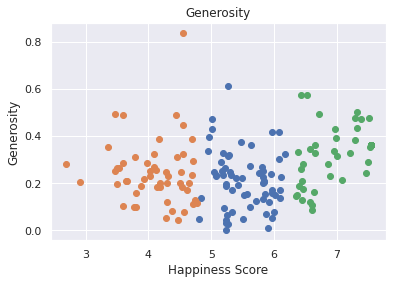

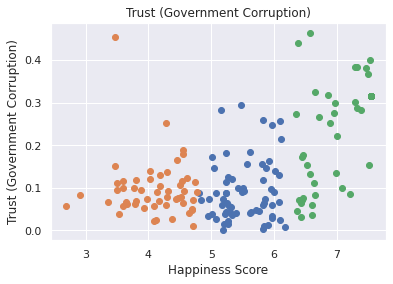

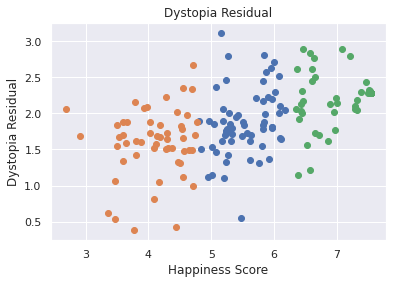

In [ ]:
display_clusters(clustered_2017)

## 2018

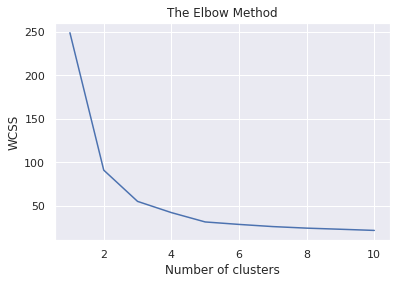

In [ ]:
find_k(world_happiness_2018_df)

We notice the best number of k is 3.

In [ ]:
clustered_2018=create_clusters(world_happiness_2018_df,3)
clustered_2018

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2
...,...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,1
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,1
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,1
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,1


and then displaying the data after clustring

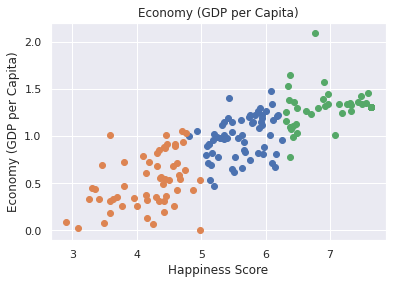

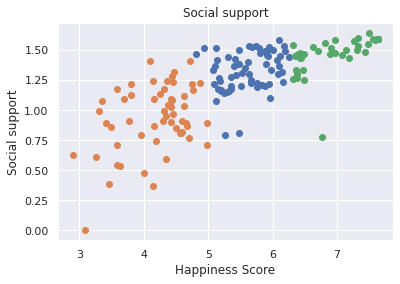

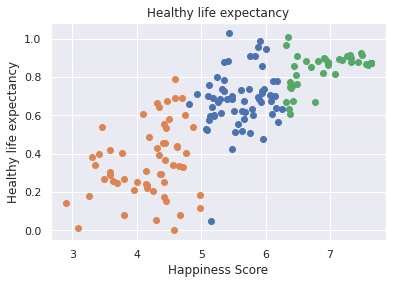

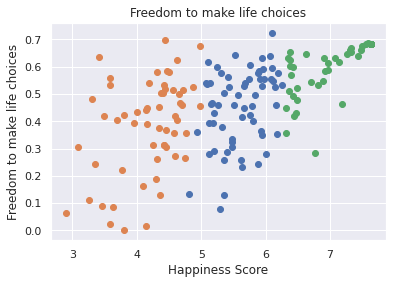

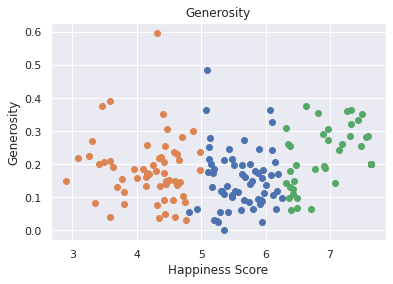

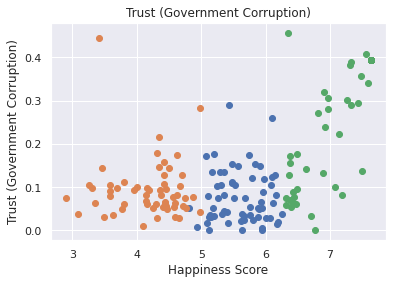

In [ ]:
display_clusters(clustered_2018)

## 2019

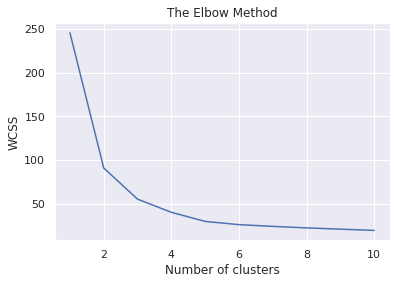

In [ ]:
find_k(world_happiness_2019_df)

We notice the best number of k is 3.

In [ ]:
clustered_2019=create_clusters(world_happiness_2019_df,3)
clustered_2019

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,0
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,0
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,0
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,0


and then displaying the data after clustring

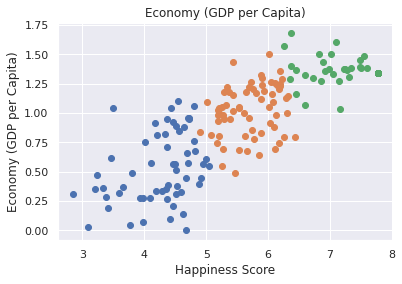

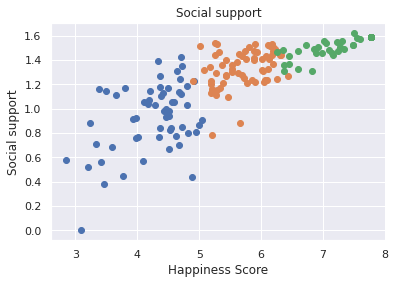

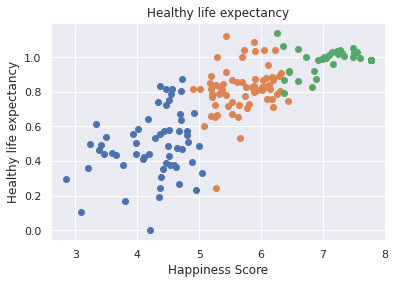

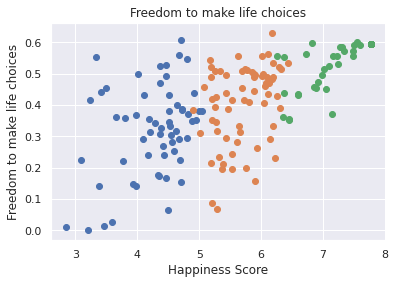

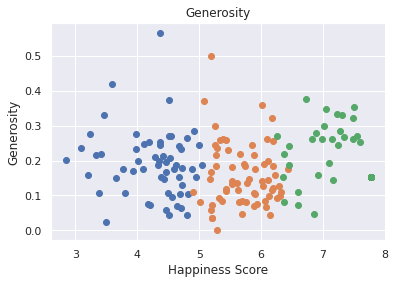

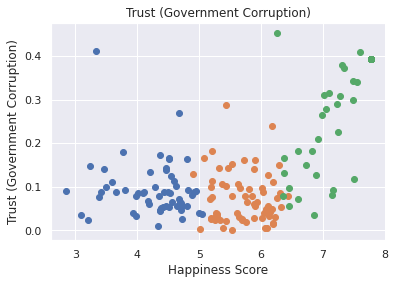

In [ ]:
display_clusters(clustered_2019)

# Outlires

## Helper methods
outlires used and viewed in box plot and scatter plots 
and The handling of the outlires was done by Smoothing by bin boundary technique

In [ ]:
def outliers_scatter(df,outliers):
    plt.scatter(df[:,0], df[:,1])
#     print("Box Plot ")  
#     print("Value = ", outliers[0][0])  
#     print("Count of Outliers ", outliers.size/2 , " Count of the normal points ", df.size/2)  
    plt.scatter(outliers[:,0],outliers[:,1], color='r')
    plt.show()
def boxplot(data,column):
    y_kmeans=data.iloc[:,-1:]
    clusters = unique(y_kmeans)
    all_outliers=pd.DataFrame(columns=data.columns)
    for cluster in clusters:
        df =  data[data['Cluster'] == cluster]
        sns.boxplot(x =df[column])
        plt.title(cluster)
        plt.show()
        Q1_df = df.quantile(0.25)
        Q3_df = df.quantile(0.75)
        IQR_df = Q3_df - Q1_df
        outliers = (df < (Q1_df - 1.5 * IQR_df)) | (df > (Q3_df + 1.5 * IQR_df))
        outliers =  df[outliers[column] == True]
        all_outliers=all_outliers.append(outliers) 
        columns =df.columns
        i=np.where(columns == column)[0][0]
        all_data=df.iloc[:,i-1:i+1].values
        outliers_df=outliers.iloc[:,i-1:i+1].values
        if(outliers.size>0):
#             print(outliers.loc[:,"Happiness Rank"].values)
#             print(outliers.loc[:,"Country"].values)
            plt.title(cluster)
            outliers_scatter(all_data,outliers_df)
    return(all_outliers)
#         else:
#             print("no outliers")


To detect and view the data

In [ ]:
def handling(data,outliers,column):
    y_kmeans=data.iloc[:,-1:]
    clusters = unique(y_kmeans)
    all_outliers=pd.DataFrame(columns=data.columns)
    for cluster in clusters:
        df =  data[data['Cluster'] == cluster]
#         i=np.where(outliers == column)
        all_values =  df.loc[:,column].values
        all_values.sort()
        outlier_value =  outliers[outliers['Cluster'] == cluster]
        outlier_value = outlier_value.loc[:,column].values
#         print(outlier_value)
        for value in outlier_value :
            i=np.where(all_values == value)[0]
            print(i)
            if(len(i)>0):
                if(i[0]>=0) :
                    all_values=np.delete(all_values,i)
                    if len(all_values)<=i[0]:
                        i=len(all_values)-1
                    value_before=all_values[i-1]
                    while(value==value_before.any()):
                        i=i-1
                        value_before=all_values[i]

                    print(value_before)
                    if(isinstance(i,np.ndarray)):
                        for i in range(len(i)):
                            data[column].replace([value], value_before[i], inplace=True)    
                    else:
                        data[column].replace([value], value_before, inplace=True) 
                else:
                    print("Already handled")
        else:
            print("Done")

The handling of the outlires with Smoothing by bin boundary technique

## 2015

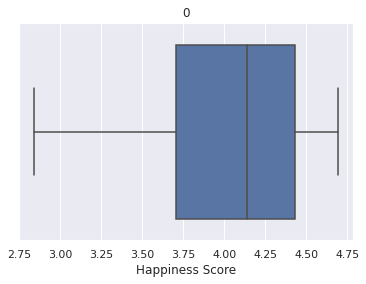

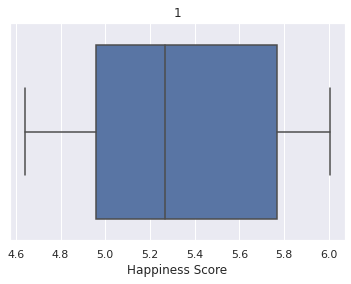

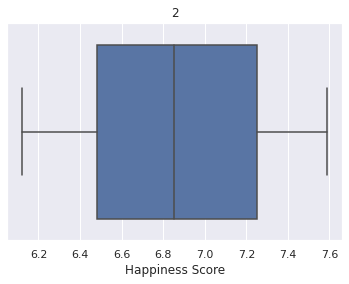

In [ ]:
outliers=boxplot(clustered_2015,"Happiness Score")

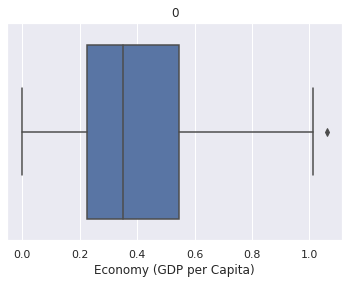

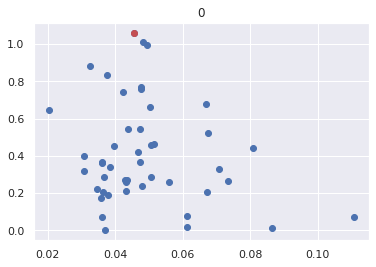

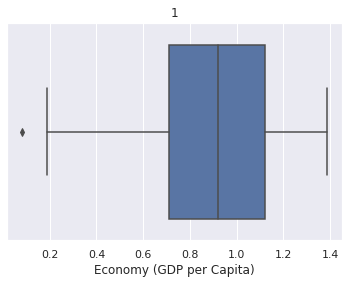

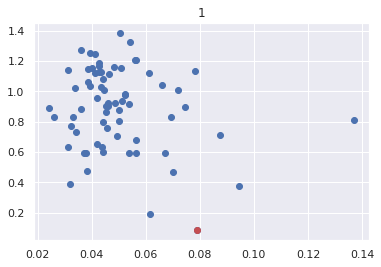

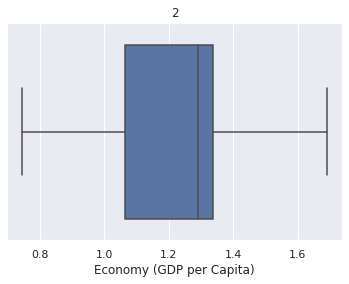

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
142,Gabon,Sub-Saharan Africa,143,3.896,0.04547,1.06024,0.90528,0.43372,0.31914,0.11091,0.06822,0.99895,0
93,Mozambique,Sub-Saharan Africa,94,4.971,0.07896,0.08308,1.02626,0.09131,0.34037,0.15603,0.22269,3.05137,1


In [ ]:
outliers=boxplot(clustered_2015,"Economy (GDP per Capita)")
outliers

In [ ]:
handling(clustered_2015,outliers,"Economy (GDP per Capita)")

[45]
0.99355
Done
[0]
[1.38604]
Done
Done


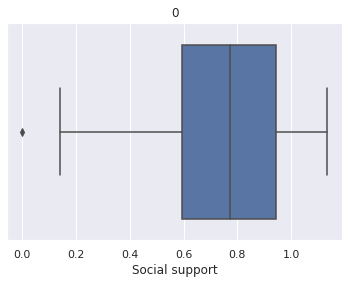

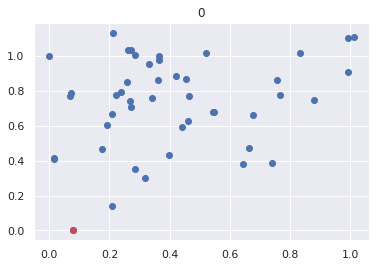

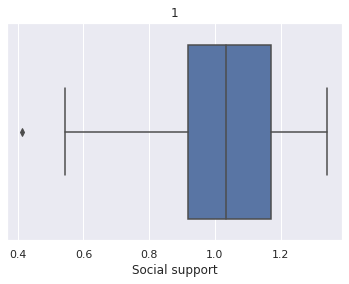

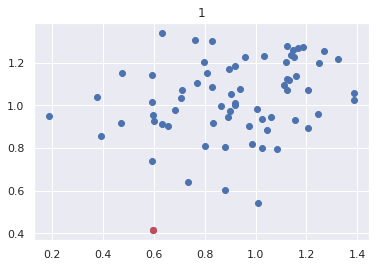

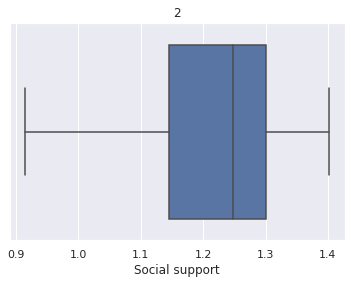

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835,2.72230,0
80,Pakistan,Southern Asia,81,5.194,0.03726,0.59543,0.41411,0.51466,0.12102,0.10464,0.33671,3.10709,1


In [ ]:
outliers=boxplot(clustered_2015,"Social support")
outliers

In [ ]:
handling(clustered_2015,outliers,"Social support")
# clustered_2015.to_csv(root_path_happiness+'2015 cl.csv')

[0]
[1.13299]
Done
[0]
[1.34043]
Done
Done


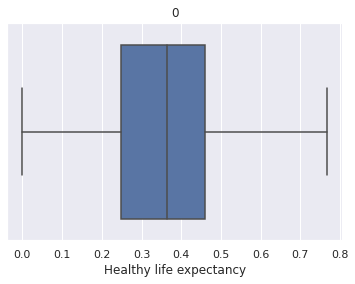

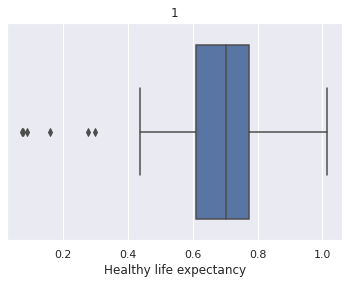

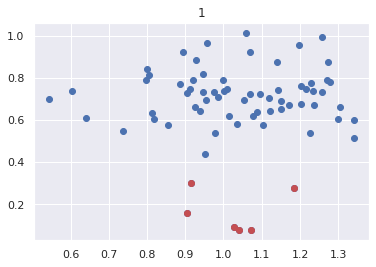

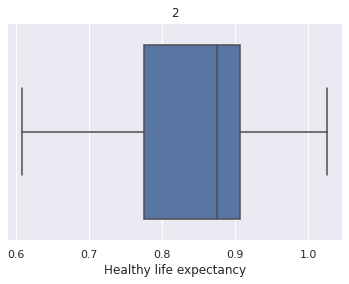

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
77,Nigeria,Sub-Saharan Africa,78,5.268,0.04192,0.65435,0.90432,0.16007,0.34334,0.04030,0.27233,2.89319,1
84,Zambia,Sub-Saharan Africa,85,5.129,0.06988,0.47038,0.91612,0.29924,0.48827,0.12468,0.19591,2.63430,1
93,Mozambique,Sub-Saharan Africa,94,4.971,0.07896,1.38604,1.02626,0.09131,0.34037,0.15603,0.22269,3.05137,1
96,Lesotho,Sub-Saharan Africa,97,4.898,0.09438,0.37545,1.04103,0.07612,0.31767,0.12504,0.16388,2.79832,1
100,Swaziland,Sub-Saharan Africa,101,4.867,0.08742,0.71206,1.07284,0.07566,0.30658,0.03060,0.18259,2.48676,1
112,South Africa,Sub-Saharan Africa,113,4.642,0.04585,0.92049,1.18468,0.27688,0.33207,0.08884,0.11973,1.71956,1


In [ ]:
outliers=boxplot(clustered_2015,"Healthy life expectancy")
outliers

In [ ]:
handling(clustered_2015,outliers,"Healthy life expectancy")

Done
[3]
[0.09131]
[4]
[0.27688]
[2]
[0.07612]
[1]
[0.07566]
[0]
[1.01328]
[0]
[1.01328]
Done
Done


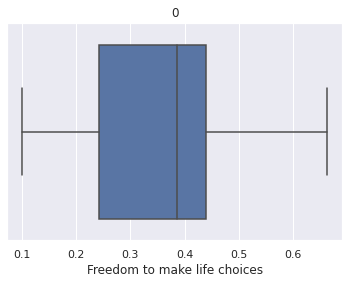

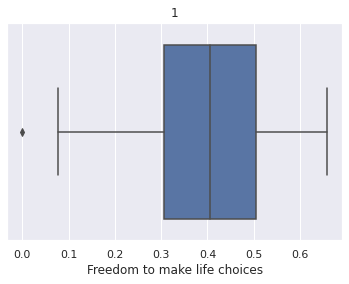

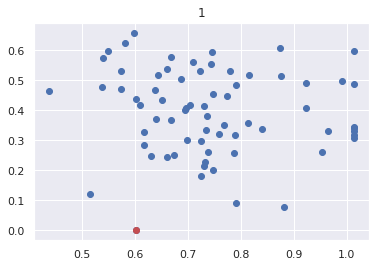

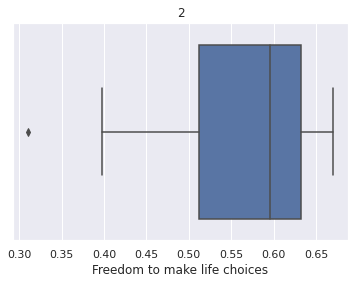

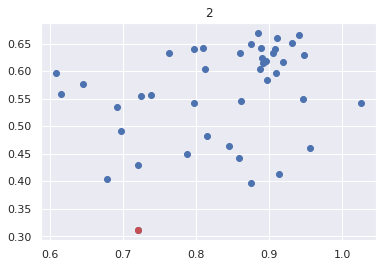

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
111,Iraq,Middle East and Northern Africa,112,4.677,0.05232,0.98549,0.81889,0.60237,0.00000,0.13788,0.17922,1.95335,1
34,Saudi Arabia,Middle East and Northern Africa,35,6.411,0.04633,1.39541,1.08393,0.72025,0.31048,0.32524,0.13706,2.43872,2


In [ ]:
outliers=boxplot(clustered_2015,"Freedom to make life choices")
outliers

In [ ]:
handling(clustered_2015,outliers,"Freedom to make life choices")

Done
[0]
[0.65821]
Done
[0]
[0.66973]
Done


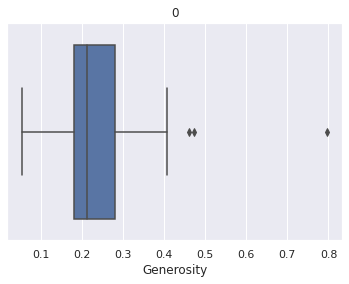

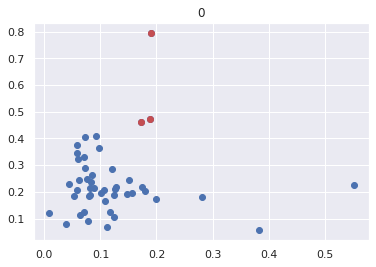

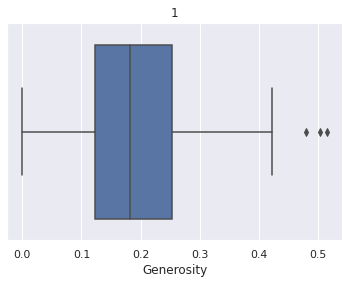

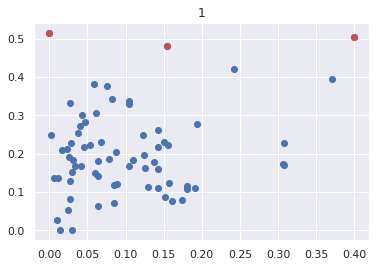

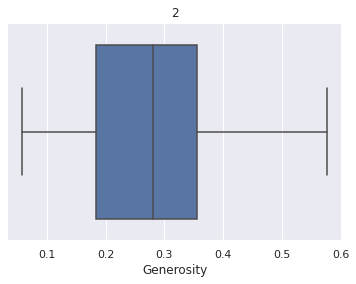

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
118,Haiti,Latin America and Caribbean,119,4.518,0.07331,0.26673,0.74302,0.38847,0.24425,0.17175,0.46187,2.24173,0
128,Myanmar,Southeastern Asia,129,4.307,0.04351,0.27108,0.70905,0.48246,0.44017,0.19034,0.79588,1.41805,0
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,0
73,Indonesia,Southeastern Asia,74,5.399,0.02596,0.82827,1.08708,0.63793,0.46611,0.00000,0.51535,1.86399,1
78,Bhutan,Southern Asia,79,5.253,0.03225,0.77042,1.10395,0.57407,0.53206,0.15445,0.47998,1.63794,1
90,Somaliland region,Sub-Saharan Africa,91,5.057,0.06161,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,2.11032,1


In [ ]:
outliers=boxplot(clustered_2015,"Generosity")
outliers

In [ ]:
handling(clustered_2015,outliers,"Generosity")

[43]
[0.40828]
[44]
0.40828000000000003
[43]
0.40359
Done
[68]
0.47998
[66]
[0.42192]
[66]
0.39478
Done
Done


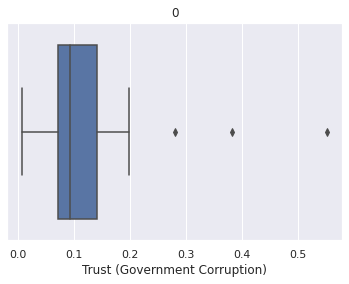

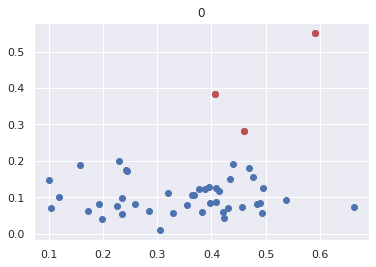

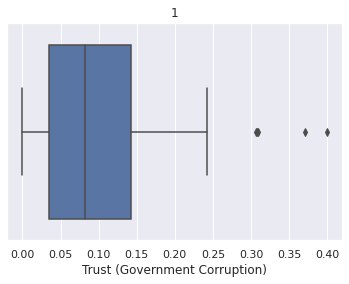

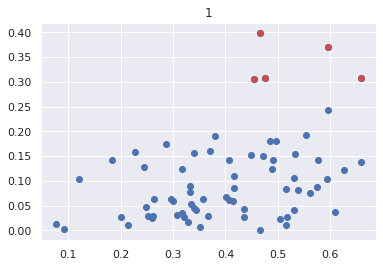

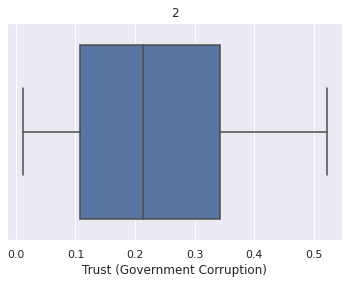

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
125,Djibouti,Sub-Saharan Africa,126,4.369,0.08096,0.44025,0.59207,0.36291,0.46074,0.28105,0.18093,2.05125,0
129,Georgia,Central and Eastern Europe,130,4.297,0.04221,0.74190,0.38562,0.72926,0.40577,0.38331,0.05547,1.59541,0
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,0
43,Uzbekistan,Central and Eastern Europe,44,6.003,0.04361,0.63244,1.34043,0.59772,0.65821,0.30826,0.22837,2.23741,1
48,Bahrain,Middle East and Northern Africa,49,5.960,0.05412,1.32376,1.21624,0.74716,0.45492,0.30600,0.17362,1.73797,1
69,Turkmenistan,Central and Eastern Europe,70,5.548,0.04175,0.95847,1.22668,0.53886,0.47610,0.30844,0.16979,1.86984,1
71,Hong Kong,Eastern Asia,72,5.474,0.05051,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478,0.65429,1
90,Somaliland region,Sub-Saharan Africa,91,5.057,0.06161,0.18847,0.95152,0.43873,0.46582,0.39928,0.39478,2.11032,1


In [ ]:
outliers=boxplot(clustered_2015,"Trust (Government Corruption)")
outliers

In [ ]:
handling(clustered_2015,outliers,"Trust (Government Corruption)")

[43]
[0.199]
[43]
[0.199]
[43]
0.19034
Done
[65]
[0.306]
[64]
[0.24249]
[64]
[0.24249]
[64]
[0.24249]
[64]
0.19317
Done
Done


## 2016

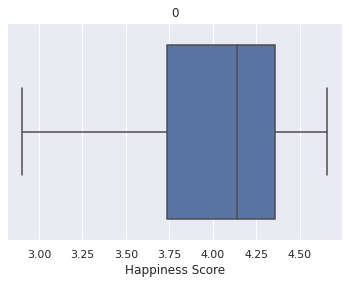

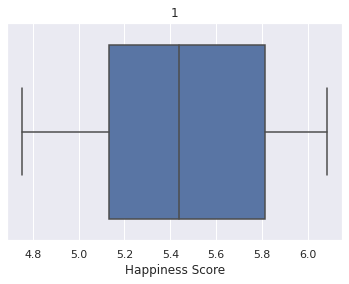

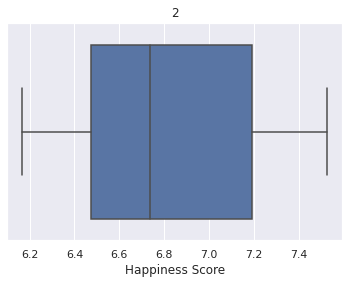

In [ ]:
outliers=boxplot(clustered_2016,"Happiness Score")

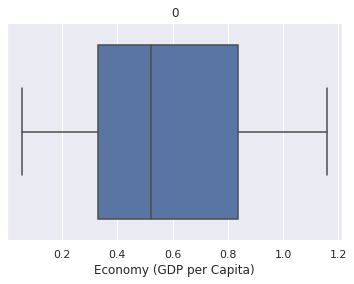

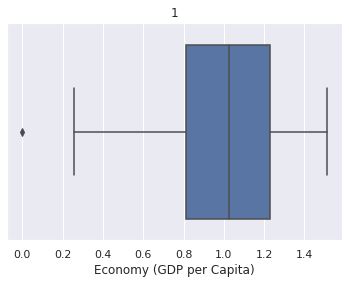

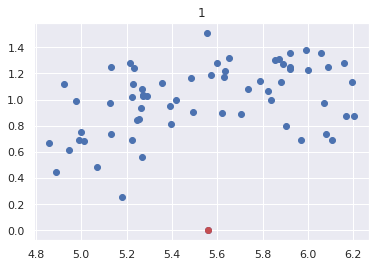

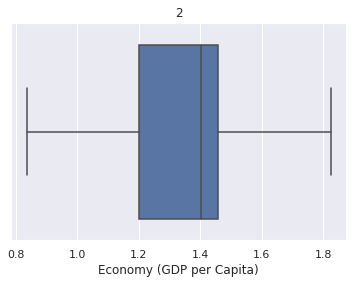

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
75,Somalia,Sub-Saharan Africa,76,5.44,5.321,5.559,0.0,0.33613,0.11466,0.56778,0.3118,0.27225,3.83772,1


In [ ]:
outliers=boxplot(clustered_2016,"Economy (GDP per Capita)")
outliers

In [ ]:
handling(clustered_2016,outliers,"Economy (GDP per Capita)")

Done
[0]
[1.5107]
Done
Done


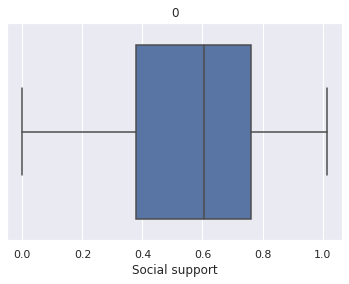

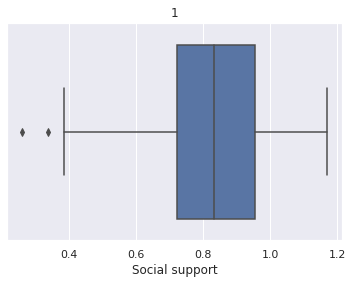

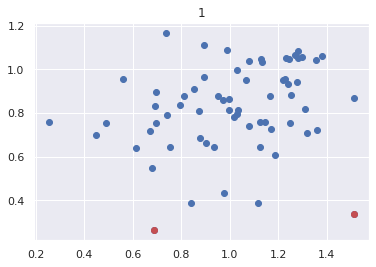

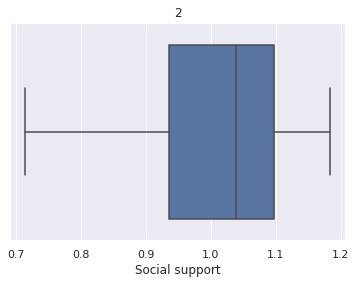

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
75,Somalia,Sub-Saharan Africa,76,5.440,5.321,5.559,1.51070,0.33613,0.11466,0.56778,0.3118,0.27225,3.83772,1
91,Pakistan,Southern Asia,92,5.132,5.038,5.226,0.68816,0.26135,0.40306,0.14622,0.1388,0.31185,3.18286,1


In [ ]:
outliers=boxplot(clustered_2016,"Social support")
outliers

In [ ]:
handling(clustered_2016,outliers,"Social support")
# clustered_2015.to_csv(root_path_happiness+'2015 cl.csv')

Done
[1]
[0.26135]
[0]
[1.1681]
Done
Done


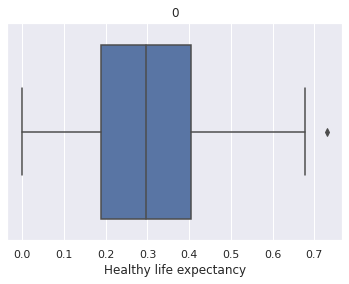

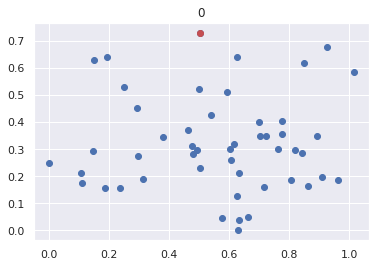

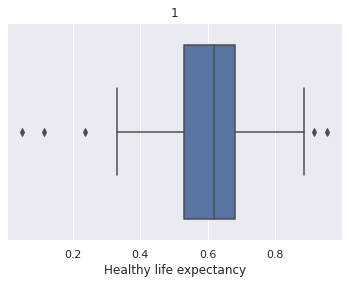

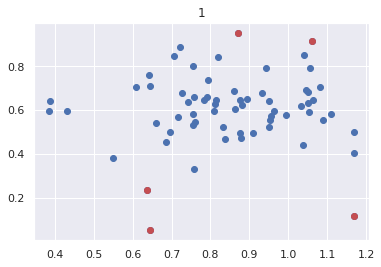

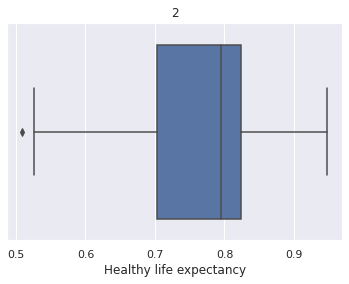

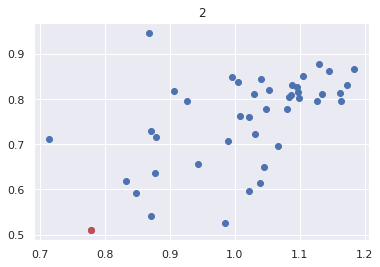

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
108,Albania,Central and Eastern Europe,109,4.655,4.546,4.764,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816,0
52,Japan,Eastern Asia,53,5.921,5.850,5.992,1.38007,1.06054,0.91491,0.46761,0.18985,0.10224,1.80584,1
74,Hong Kong,Eastern Asia,75,5.458,5.362,5.554,1.51070,0.87021,0.95277,0.48079,0.31647,0.40097,0.92614,1
75,Somalia,Sub-Saharan Africa,76,5.440,5.321,5.559,1.51070,1.16810,0.11466,0.56778,0.31180,0.27225,3.83772,1
102,Nigeria,Sub-Saharan Africa,103,4.875,4.750,5.000,0.75216,0.64498,0.05108,0.27854,0.03050,0.23219,2.88586,1
105,Zambia,Sub-Saharan Africa,106,4.795,4.645,4.945,0.61202,0.63760,0.23573,0.42662,0.11479,0.17866,2.58991,1
39,Suriname,Latin America and Caribbean,40,6.269,6.073,6.465,1.09686,0.77866,0.50933,0.52234,0.12692,0.16665,3.06852,2


In [ ]:
outliers=boxplot(clustered_2016,"Healthy life expectancy")
outliers

In [ ]:
handling(clustered_2016,outliers,"Healthy life expectancy")

[48]
0.64083
Done
[63]
[0.88645]
[63]
0.8510200000000001
[1]
[0.05108]
[0]
[0.88645]
[0]
[0.88645]
Done
[0]
[0.94719]
Done


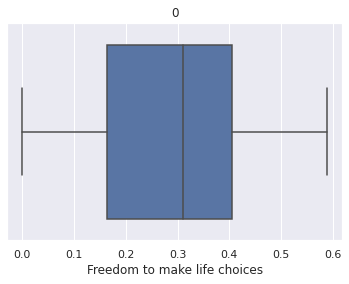

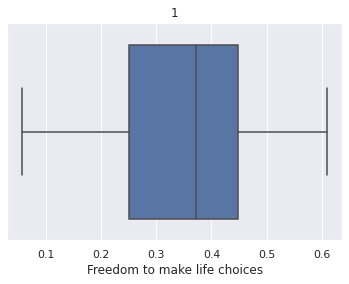

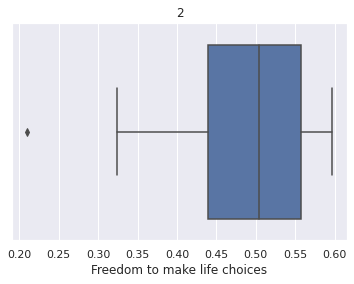

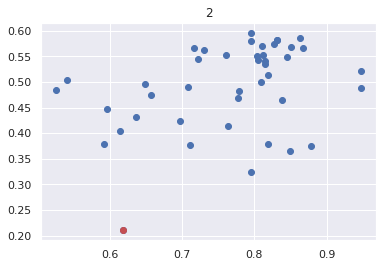

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
37,Algeria,Middle East and Northern Africa,38,6.355,6.227,6.483,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904,2


In [ ]:
outliers=boxplot(clustered_2016,"Freedom to make life choices")
outliers

In [ ]:
handling(clustered_2016,outliers,"Freedom to make life choices")

Done
Done
[0]
[0.59609]
Done


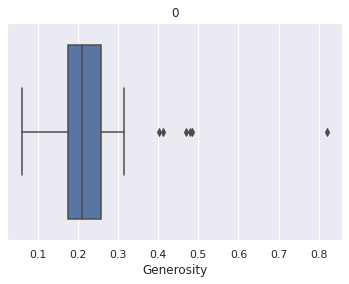

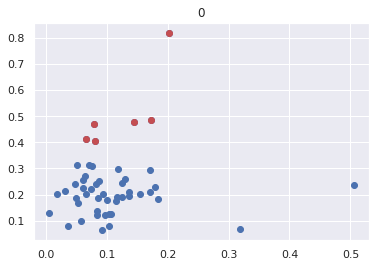

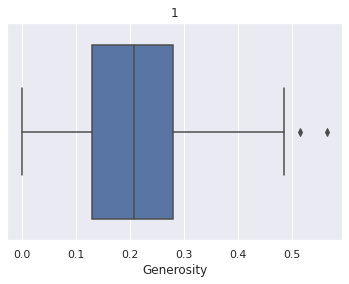

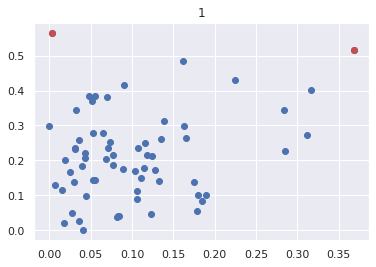

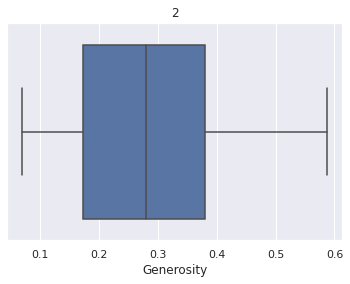

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
116,Sri Lanka,Southern Asia,117,4.415,4.322,4.508,0.97318,0.84783,0.62007,0.50817,0.07964,0.46978,0.91681,0
118,Myanmar,Southeastern Asia,119,4.395,4.327,4.463,0.34112,0.69981,0.39880,0.42692,0.20243,0.81971,1.50655,0
121,Kenya,Sub-Saharan Africa,122,4.356,4.259,4.453,0.52267,0.76240,0.30147,0.40576,0.06686,0.41328,1.88326,0
135,Haiti,Latin America and Caribbean,136,4.028,3.893,4.163,0.34097,0.29561,0.27494,0.12072,0.14476,0.47958,2.37116,0
139,Cambodia,Southeastern Asia,140,3.907,3.798,4.016,0.55604,0.53750,0.42494,0.58852,0.08092,0.40339,1.31573,0
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,0
78,Indonesia,Southeastern Asia,79,5.314,5.237,5.391,0.95104,0.87625,0.49374,0.39237,0.00322,0.56521,2.03171,1
96,Somaliland Region,Sub-Saharan Africa,97,5.057,4.934,5.180,0.25558,0.75862,0.33108,0.39130,0.36794,0.51479,2.43801,1


In [ ]:
outliers=boxplot(clustered_2016,"Generosity")
outliers

In [ ]:
handling(clustered_2016,outliers,"Generosity")

[45]
[0.41328]
[47]
0.47958
[44]
[0.40339]
[44]
[0.40339]
[43]
[0.31472]
[43]
0.31268
Done
[64]
0.48546000000000006
[63]
0.43078999999999995
Done
Done


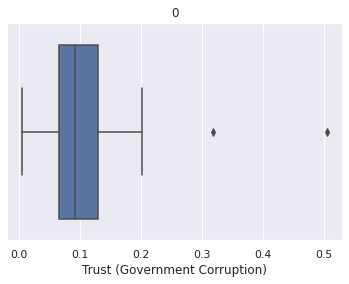

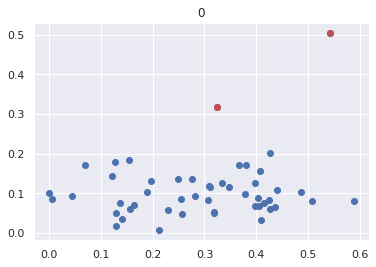

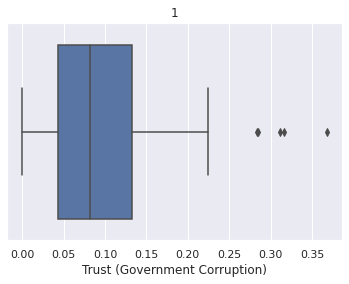

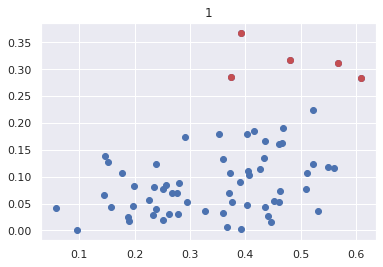

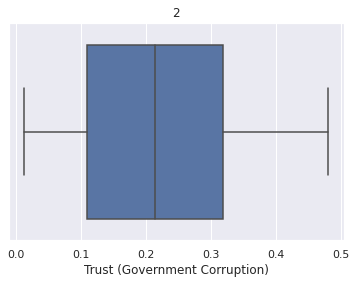

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
125,Georgia,Central and Eastern Europe,126,4.252,4.164,4.340,0.83792,0.19249,0.64035,0.32461,0.31880,0.06786,1.87031,0
151,Rwanda,Sub-Saharan Africa,152,3.515,3.444,3.586,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819,0
48,Uzbekistan,Central and Eastern Europe,49,5.987,5.896,6.078,0.73591,1.16810,0.50163,0.60848,0.28333,0.34326,2.34638,1
64,Turkmenistan,Central and Eastern Europe,65,5.658,5.580,5.736,1.08017,1.03817,0.44006,0.37408,0.28467,0.22567,2.21489,1
74,Hong Kong,Eastern Asia,75,5.458,5.362,5.554,1.51070,0.87021,0.85102,0.48079,0.31647,0.40097,0.92614,1
75,Somalia,Sub-Saharan Africa,76,5.440,5.321,5.559,1.51070,1.16810,0.88645,0.56778,0.31180,0.27225,3.83772,1
96,Somaliland Region,Sub-Saharan Africa,97,5.057,4.934,5.180,0.25558,0.75862,0.33108,0.39130,0.36794,0.43079,2.43801,1


In [ ]:
outliers=boxplot(clustered_2016,"Trust (Government Corruption)")
outliers

In [ ]:
handling(clustered_2016,outliers,"Trust (Government Corruption)")

[47]
[0.20243]
[47]
0.18437
Done
[60]
[0.22423]
[60]
[0.22423]
[61]
[0.3118]
[60]
[0.22423]
[60]
0.18985
Done
Done


## 2017

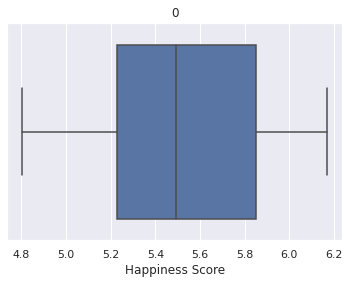

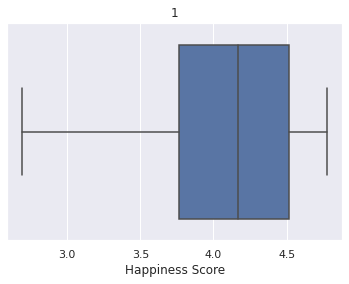

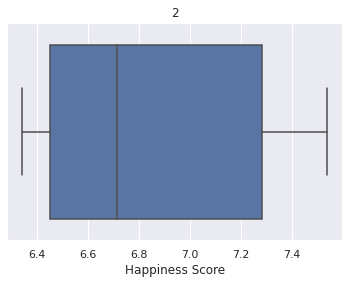

In [ ]:
outliers=boxplot(clustered_2017,"Happiness Score")

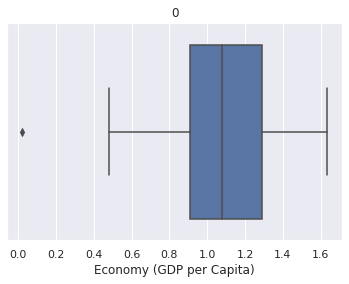

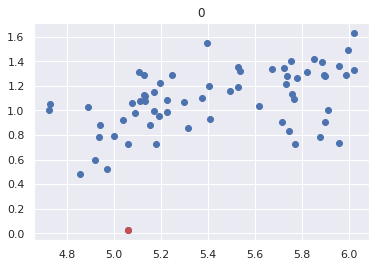

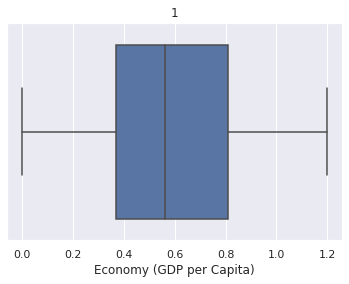

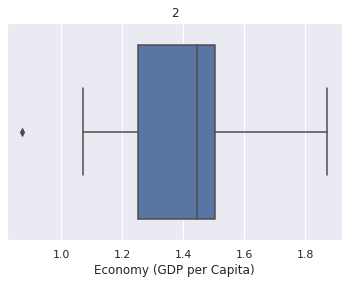

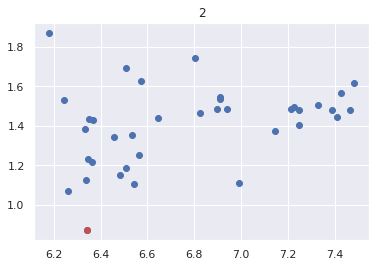

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Dystopia Residual,Cluster
92,Somalia,93,5.151,5.242484,5.059516,0.022643,0.721151,0.113989,0.602127,0.291631,0.282410,3.117485,0
28,Guatemala,29,6.454,6.566874,6.341126,0.872002,1.255585,0.540240,0.531311,0.283488,0.077223,2.893891,2


In [ ]:
outliers=boxplot(clustered_2017,"Economy (GDP per Capita)")
outliers

In [ ]:
handling(clustered_2017,outliers,"Economy (GDP per Capita)")

[0]
[1.63295245]
Done
Done
[0]
[1.87076569]
Done


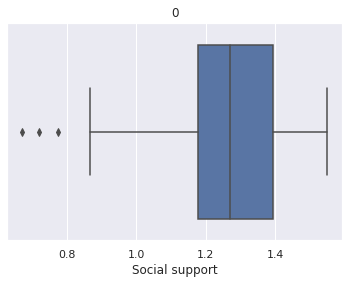

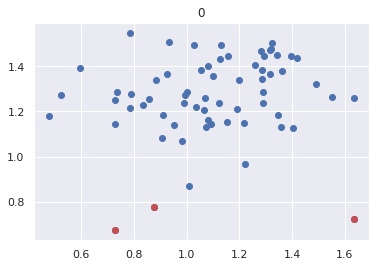

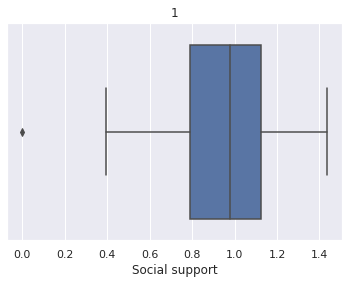

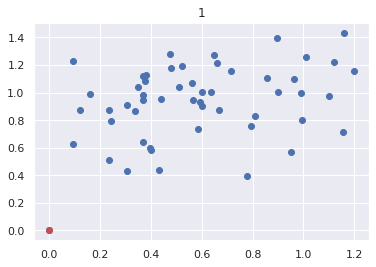

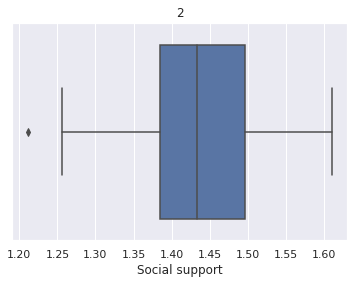

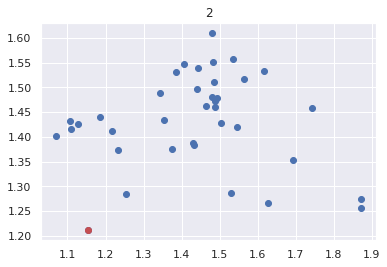

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Dystopia Residual,Cluster
79,Pakistan,80,5.269,5.359984,5.178016,0.726884,0.672691,0.402048,0.235215,0.315446,0.124348,2.792489,0
83,Morocco,84,5.235,5.318341,5.151659,0.878115,0.774864,0.597711,0.408158,0.032210,0.087763,2.456189,0
92,Somalia,93,5.151,5.242484,5.059516,1.632952,0.721151,0.113989,0.602127,0.291631,0.282410,3.117485,0
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,1
24,Mexico,25,6.578,6.671149,6.484851,1.153184,1.210862,0.709979,0.412730,0.120990,0.132774,2.837155,2


In [ ]:
outliers=boxplot(clustered_2017,"Social support")
outliers

In [ ]:
handling(clustered_2017,outliers,"Social support")
# clustered_2015.to_csv(root_path_happiness+'2015 cl.csv')

[0]
[1.54896915]
[1]
[0.72115135]
[0]
[1.54896915]
Done
[0]
[1.43437946]
Done
[0]
[1.61057401]
Done


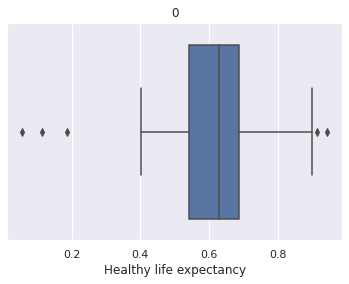

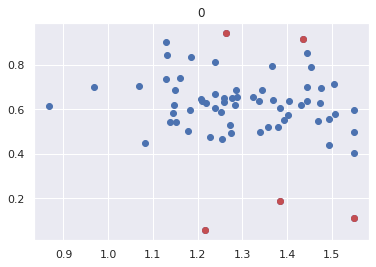

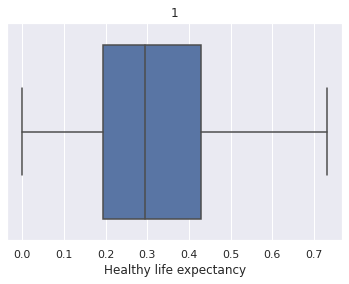

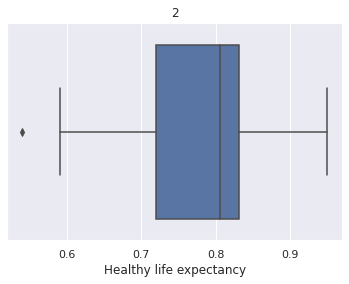

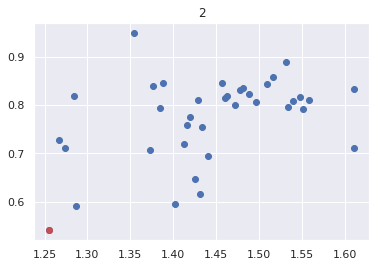

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Dystopia Residual,Cluster
50,Japan,51,5.920,5.990719,5.849281,1.416915,1.436338,0.913476,0.505626,0.120573,0.163761,1.363224,0
70,"Hong Kong S.A.R., China",71,5.472,5.549594,5.394406,1.551675,1.262791,0.943062,0.490969,0.374466,0.293934,0.554633,0
92,Somalia,93,5.151,5.242484,5.059516,1.632952,1.548969,0.113989,0.602127,0.291631,0.282410,3.117485,0
94,Nigeria,95,5.074,5.209500,4.938500,0.783756,1.215770,0.056916,0.394953,0.230947,0.026122,2.365391,0
100,South Africa,101,4.829,4.929435,4.728565,1.054699,1.384789,0.187080,0.479247,0.139362,0.072509,1.510909,0
28,Guatemala,29,6.454,6.566874,6.341126,1.870766,1.255585,0.540240,0.531311,0.283488,0.077223,2.893891,2


In [ ]:
outliers=boxplot(clustered_2017,"Healthy life expectancy")
outliers

In [ ]:
handling(clustered_2017,outliers,"Healthy life expectancy")

[63]
[0.90021408]
[63]
0.8531443476676941
[1]
[0.05691573]
[0]
[0.90021408]
[0]
[0.90021408]
Done
Done
[0]
[0.94949239]
Done


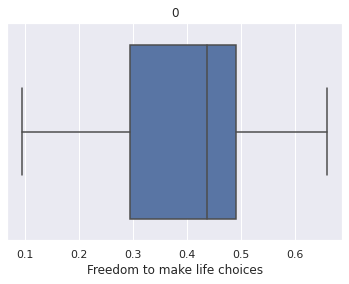

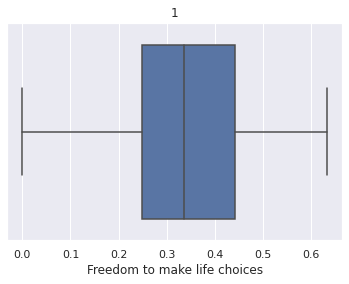

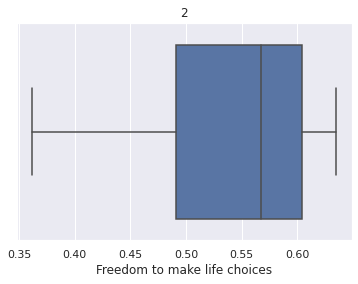

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Dystopia Residual,Cluster


In [ ]:
outliers=boxplot(clustered_2017,"Freedom to make life choices")
outliers

In [ ]:
handling(clustered_2017,outliers,"Freedom to make life choices")

Done
Done
Done


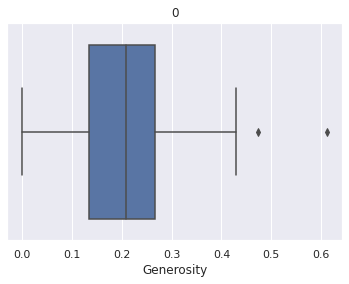

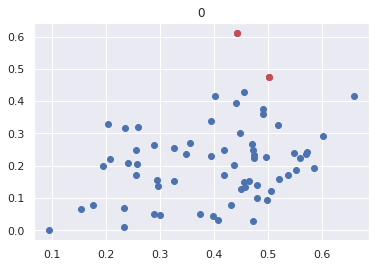

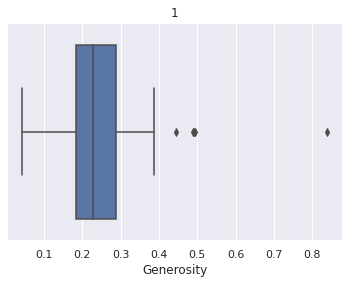

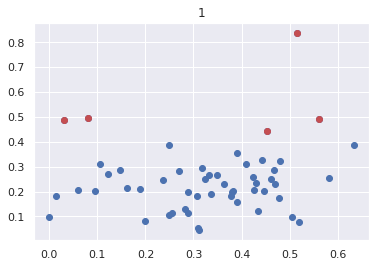

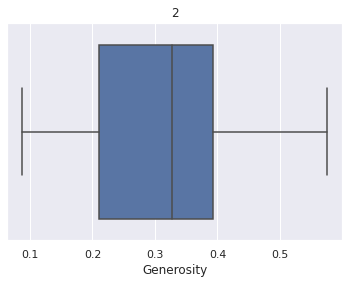

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Dystopia Residual,Cluster
80,Indonesia,81,5.262,5.352889,5.171112,0.995539,1.274445,0.492346,0.443323,0.611705,0.015317,1.429477,0
96,Bhutan,97,5.011,5.079335,4.942666,0.885416,1.340127,0.495879,0.501538,0.474055,0.173380,1.140184,0
111,Kenya,112,4.553,4.655692,4.450308,0.560479,1.067951,0.309988,0.452764,0.444860,0.064641,1.651902,1
113,Myanmar,114,4.545,4.614740,4.475260,0.367111,1.123236,0.397523,0.514492,0.838075,0.188816,1.115290,1
119,Sri Lanka,120,4.440,4.553447,4.326553,1.009850,1.259976,0.625131,0.561213,0.490864,0.073654,0.419389,1
144,Haiti,145,3.603,3.734715,3.471285,0.368610,0.640450,0.277321,0.030370,0.489204,0.099872,1.697168,1
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,1


In [ ]:
outliers=boxplot(clustered_2017,"Generosity")
outliers

In [ ]:
handling(clustered_2017,outliers,"Generosity")

[64]
0.42858037352562
[63]
0.416608929634094
Done
[48]
[0.38724291]
[51]
0.49086356163024897
[49]
[0.48920378]
[48]
[0.38724291]
[48]
0.385922968387604
Done
Done


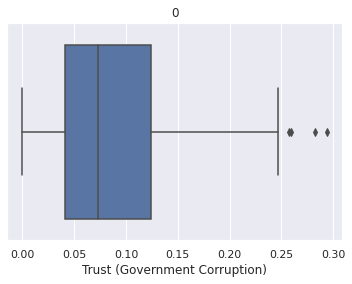

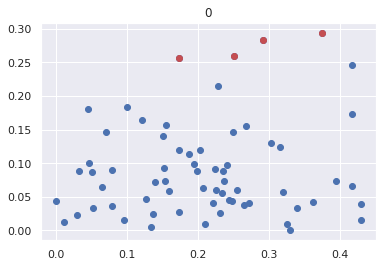

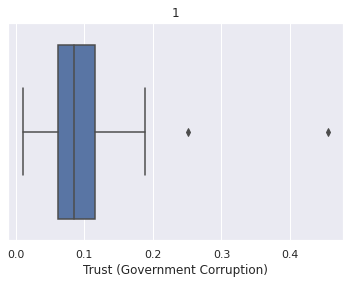

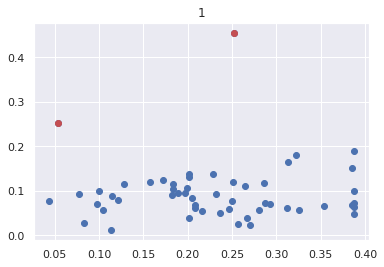

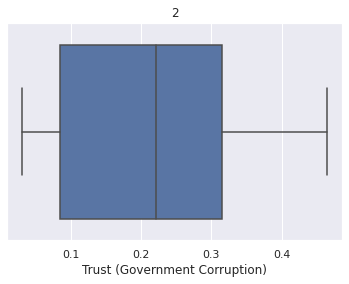

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Dystopia Residual,Cluster
40,Bahrain,41,6.087,6.178989,5.995011,1.488412,1.323110,0.653133,0.536747,0.172668,0.257042,1.656149,0
58,Turkmenistan,59,5.822,5.885181,5.758819,1.130777,1.493149,0.437726,0.418272,0.249925,0.259270,1.832910,0
70,"Hong Kong S.A.R., China",71,5.472,5.549594,5.394406,1.551675,1.262791,0.853144,0.490969,0.374466,0.293934,0.554633,0
92,Somalia,93,5.151,5.242484,5.059516,1.632952,1.548969,0.900214,0.602127,0.291631,0.282410,3.117485,0
124,Georgia,125,4.286,4.374934,4.197066,0.950613,0.570615,0.649547,0.309410,0.054009,0.251667,1.500138,1
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,1


In [ ]:
outliers=boxplot(clustered_2017,"Trust (Government Corruption)")
outliers

In [ ]:
handling(clustered_2017,outliers,"Trust (Government Corruption)")

[61]
[0.24652822]
[61]
[0.24652822]
[62]
0.246528223156929
[61]
0.21515955030918102
Done
[51]
[0.1888162]
[51]
0.17943638563156103
Done
Done


## 2018

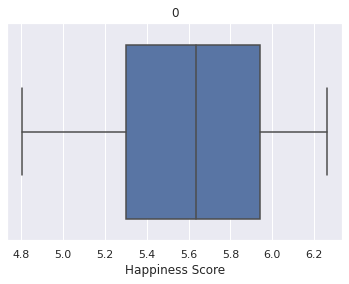

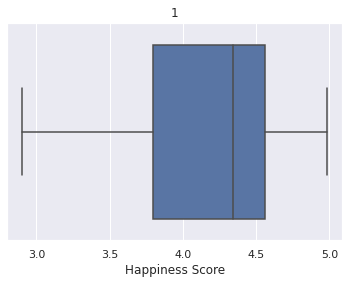

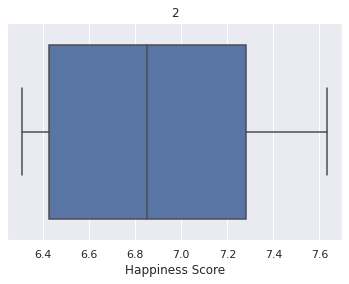

In [ ]:
outliers=boxplot(clustered_2018,"Happiness Score")

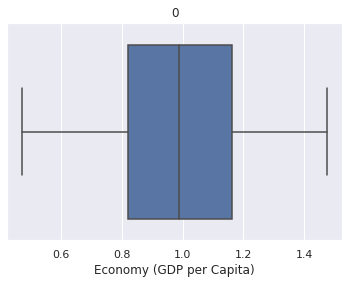

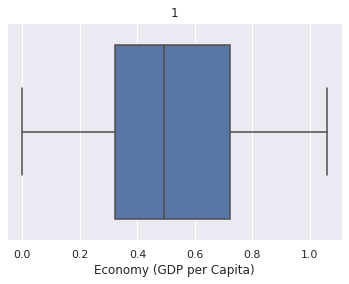

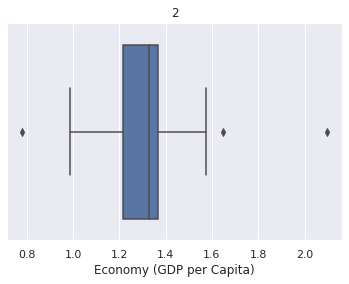

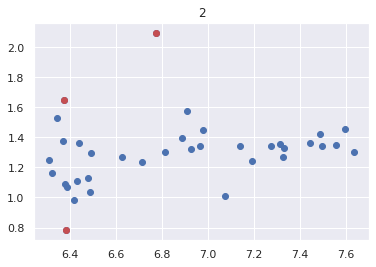

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster
19,20,United Arab Emirates,6.774,2.096,0.776,0.670,0.284,0.186,0.000,2
29,30,Guatemala,6.382,0.781,1.268,0.608,0.604,0.179,0.071,2
31,32,Qatar,6.374,1.649,1.303,0.748,0.654,0.256,0.171,2


In [ ]:
outliers=boxplot(clustered_2018,"Economy (GDP per Capita)")
outliers

In [ ]:
handling(clustered_2018,outliers,"Economy (GDP per Capita)")

Done
Done
[35]
1.5759999999999998
[0]
[1.649]
[33]
1.5290000000000001
Done


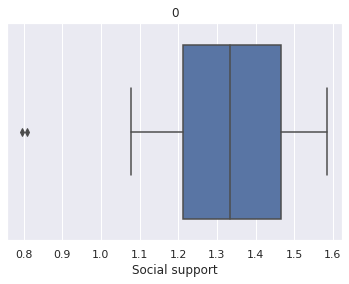

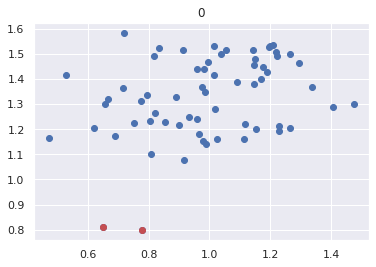

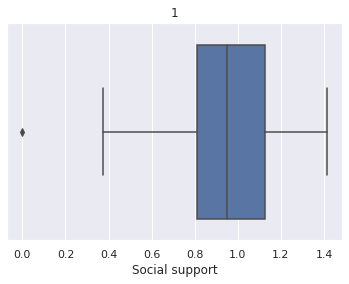

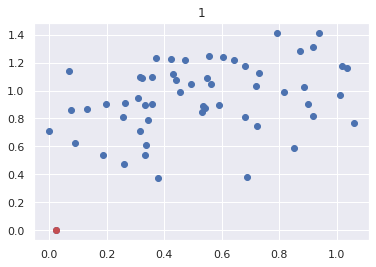

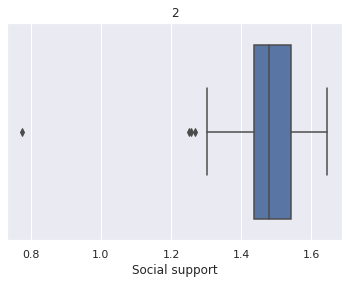

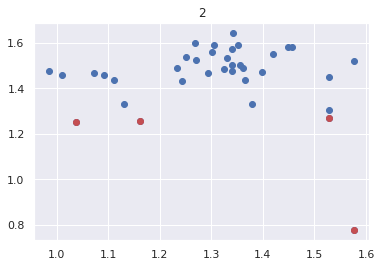

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster
74,75,Pakistan,5.472,0.652,0.810,0.424,0.334,0.216,0.113,0
84,85,Morocco,5.254,0.779,0.797,0.669,0.460,0.026,0.074,0
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,1
19,20,United Arab Emirates,6.774,1.576,0.776,0.670,0.284,0.186,0.000,2
23,24,Mexico,6.488,1.038,1.252,0.761,0.479,0.069,0.095,2
29,30,Guatemala,6.382,1.529,1.268,0.608,0.604,0.179,0.071,2
34,35,Malaysia,6.322,1.161,1.258,0.669,0.356,0.311,0.059,2


In [ ]:
outliers=boxplot(clustered_2018,"Social support")
outliers

In [ ]:
handling(clustered_2018,outliers,"Social support")
# clustered_2015.to_csv(root_path_happiness+'2015 cl.csv')

[1]
[0.797]
[0]
[1.584]
Done
[0]
[1.413]
Done
[0]
[1.644]
[0]
[1.644]
[1]
[1.258]
[0]
[1.644]
Done


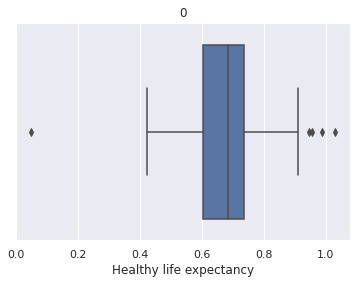

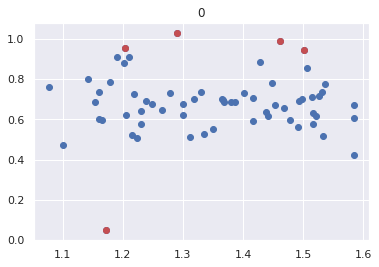

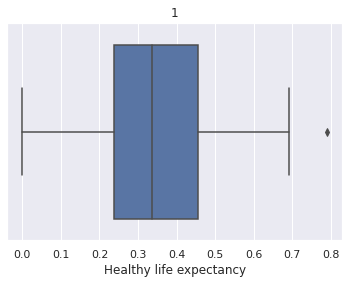

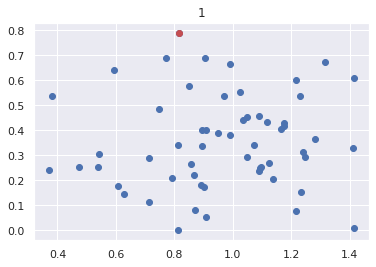

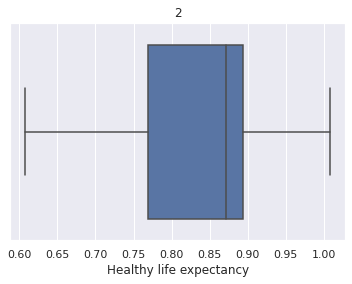

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster
46,47,Italy,6.000,1.264,1.501,0.946,0.281,0.137,0.028,0
53,54,Japan,5.915,1.294,1.462,0.988,0.553,0.079,0.150,0
56,57,South Korea,5.875,1.266,1.204,0.955,0.244,0.175,0.051,0
75,76,Hong Kong,5.430,1.405,1.290,1.030,0.524,0.246,0.291,0
90,91,Nigeria,5.155,0.689,1.172,0.048,0.462,0.201,0.032,0
111,112,Albania,4.586,0.916,0.817,0.790,0.419,0.149,0.032,1


In [ ]:
outliers=boxplot(clustered_2018,"Healthy life expectancy")
outliers

In [ ]:
handling(clustered_2018,outliers,"Healthy life expectancy")

[59]
[0.909]
[60]
[0.955]
[59]
[0.909]
[59]
0.909
[0]
[0.909]
Done
[56]
0.69
Done
Done


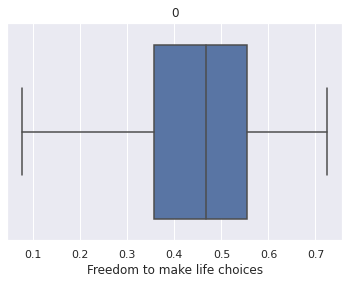

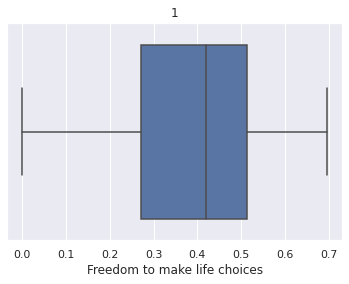

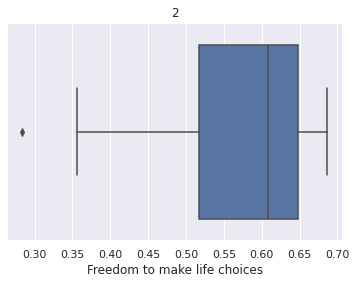

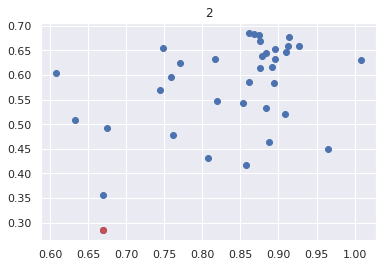

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster
19,20,United Arab Emirates,6.774,1.576,1.644,0.67,0.284,0.186,0.0,2


In [ ]:
outliers=boxplot(clustered_2018,"Freedom to make life choices")
outliers

In [ ]:
handling(clustered_2018,outliers,"Freedom to make life choices")

Done
Done
[0]
[0.686]
Done


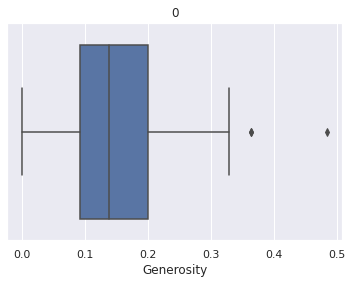

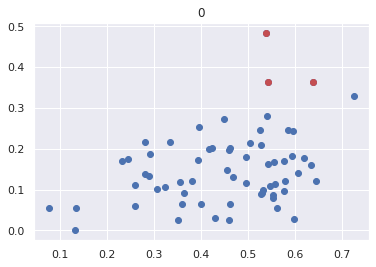

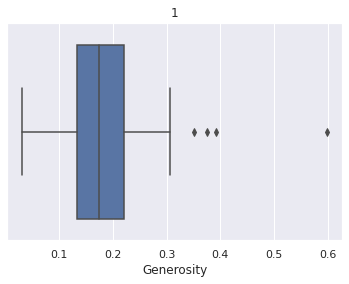

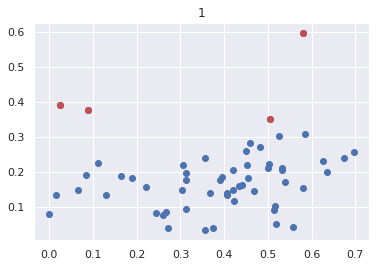

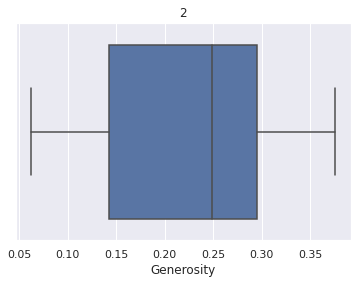

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster
45,46,Thailand,6.072,1.016,1.417,0.707,0.637,0.364,0.029,0
95,96,Indonesia,5.093,0.899,1.215,0.522,0.538,0.484,0.018,0
96,97,Bhutan,5.082,0.796,1.335,0.527,0.541,0.364,0.171,0
123,124,Kenya,4.410,0.493,1.048,0.454,0.504,0.352,0.055,1
129,130,Myanmar,4.308,0.682,1.174,0.429,0.580,0.598,0.178,1
147,148,Haiti,3.582,0.315,0.714,0.289,0.025,0.392,0.104,1
149,150,Syria,3.462,0.689,0.382,0.539,0.088,0.376,0.144,1


In [ ]:
outliers=boxplot(clustered_2018,"Generosity")
outliers

In [ ]:
handling(clustered_2018,outliers,"Generosity")

[60 61]
[0.328 0.484]
[60]
0.281
[]
Done
[53]
[0.307]
[55]
0.376
[54]
0.307
[53]
0.302
Done
Done


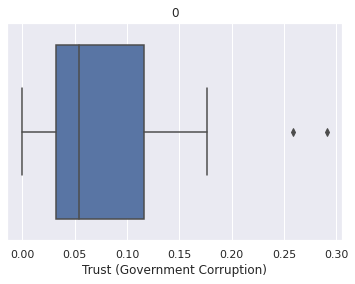

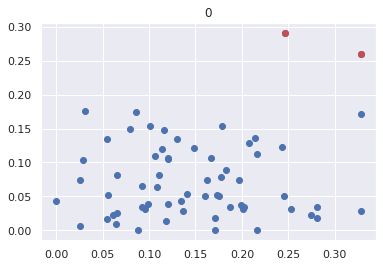

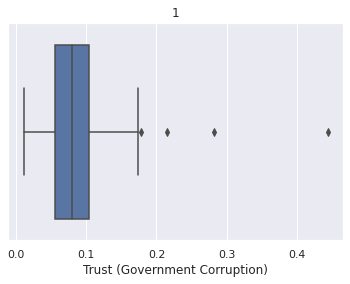

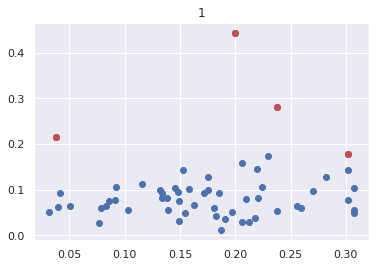

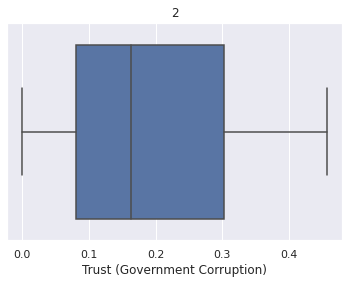

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster
43,44,Uzbekistan,6.096,0.719,1.584,0.605,0.724,0.328,0.259,0
75,76,Hong Kong,5.430,1.405,1.290,0.909,0.524,0.246,0.291,0
97,98,Somalia,4.982,0.000,0.712,0.115,0.674,0.238,0.282,1
127,128,Georgia,4.340,0.853,0.592,0.643,0.375,0.038,0.215,1
129,130,Myanmar,4.308,0.682,1.174,0.429,0.580,0.302,0.178,1
150,151,Rwanda,3.408,0.332,0.896,0.400,0.636,0.200,0.444,1


In [ ]:
outliers=boxplot(clustered_2018,"Trust (Government Corruption)")
outliers

In [ ]:
handling(clustered_2018,outliers,"Trust (Government Corruption)")

[61]
[0.176]
[61]
0.174
Done
[55]
[0.215]
[54]
[0.178]
[53]
[0.174]
[53]
0.158
Done
Done


## 2019

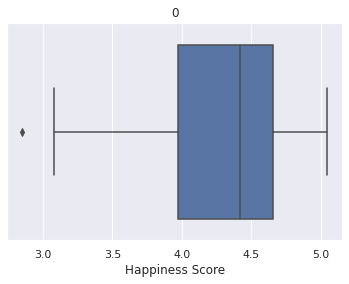

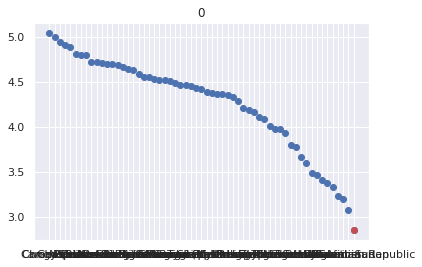

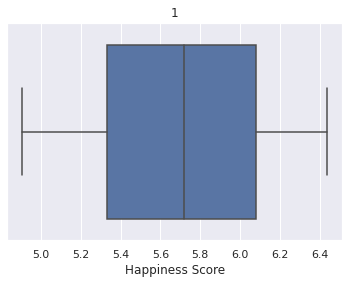

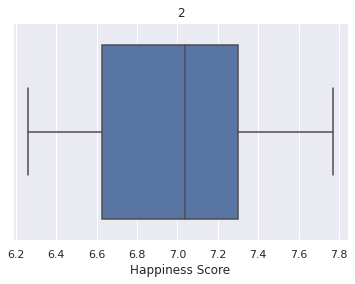

In [ ]:
outliers=boxplot(clustered_2019,"Happiness Score")

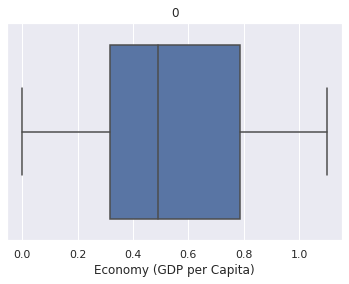

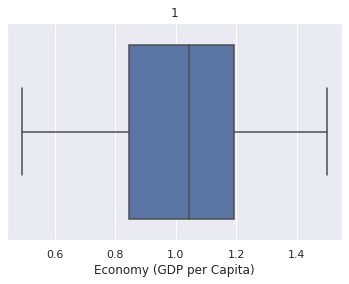

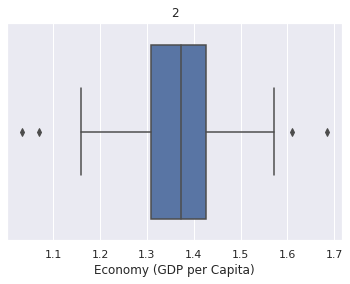

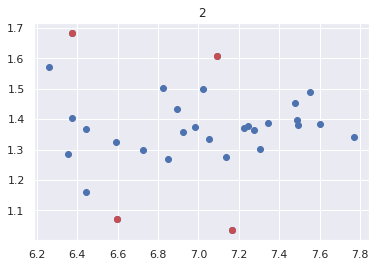

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster
11,12,Costa Rica,7.167,1.034,1.441,0.963,0.558,0.144,0.093,2
13,14,Luxembourg,7.090,1.609,1.479,1.012,0.526,0.194,0.316,2
22,23,Mexico,6.595,1.070,1.323,0.861,0.433,0.074,0.073,2
28,29,Qatar,6.374,1.684,1.313,0.871,0.555,0.220,0.167,2


In [ ]:
outliers=boxplot(clustered_2019,"Economy (GDP per Capita)")
outliers

In [ ]:
handling(clustered_2019,outliers,"Economy (GDP per Capita)")

Done
Done
[0]
[1.684]
[27]
[1.572]
[0]
[1.684]
[26]
1.5030000000000001
Done


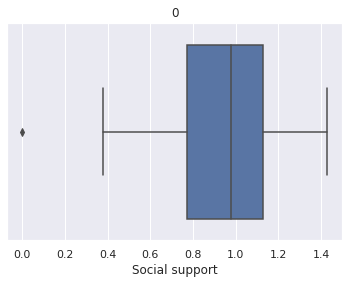

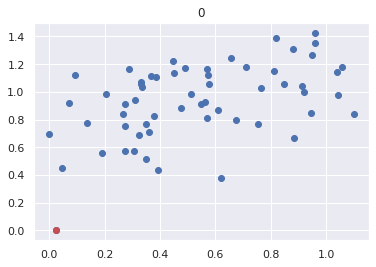

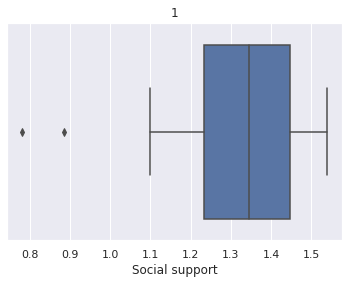

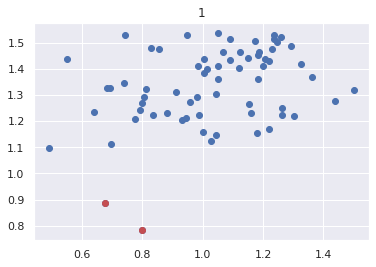

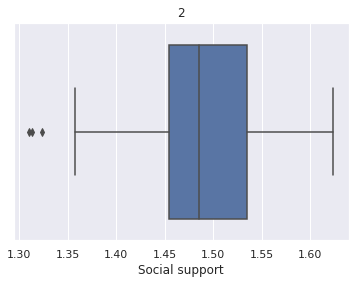

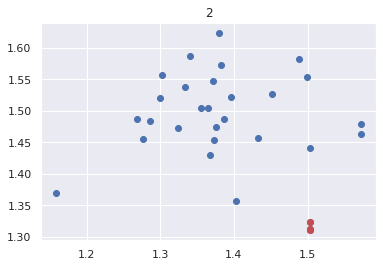

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,0
66,67,Pakistan,5.653,0.677,0.886,0.535,0.313,0.220,0.098,1
88,89,Morocco,5.208,0.801,0.782,0.782,0.418,0.036,0.076,1
20,21,United Arab Emirates,6.825,1.503,1.310,0.825,0.598,0.262,0.182,2
22,23,Mexico,6.595,1.503,1.323,0.861,0.433,0.074,0.073,2
28,29,Qatar,6.374,1.503,1.313,0.871,0.555,0.220,0.167,2


In [ ]:
outliers=boxplot(clustered_2019,"Social support")
outliers

In [ ]:
handling(clustered_2019,outliers,"Social support")


[0]
[1.427]
Done
[1]
[0.782]
[0]
[1.538]
Done
[0]
[1.624]
[1]
[1.313]
[0]
[1.624]
Done


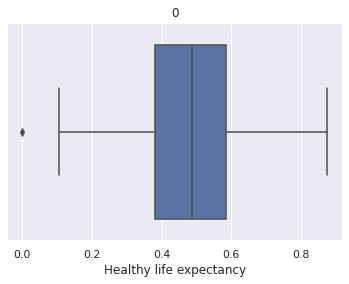

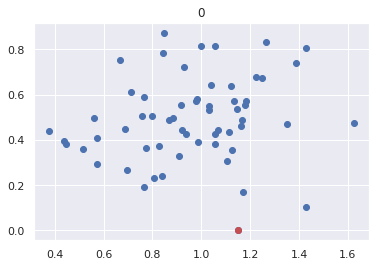

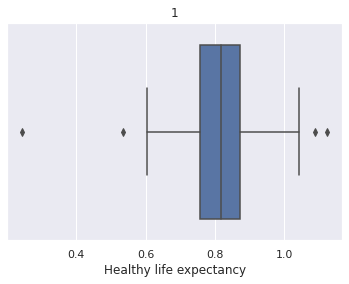

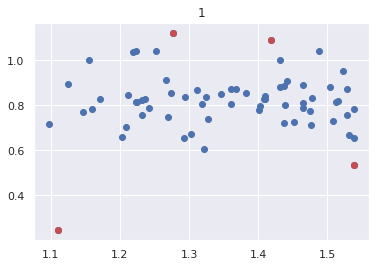

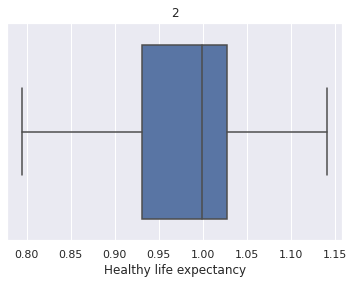

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster
134,135,Swaziland,4.212,0.811,1.149,0.000,0.313,0.074,0.135,0
57,58,Japan,5.886,1.327,1.419,1.088,0.445,0.069,0.140,1
66,67,Pakistan,5.653,0.677,1.538,0.535,0.313,0.220,0.098,1
75,76,Hong Kong,5.430,1.438,1.277,1.122,0.440,0.258,0.287,1
84,85,Nigeria,5.265,0.696,1.111,0.245,0.426,0.215,0.041,1


In [ ]:
outliers=boxplot(clustered_2019,"Healthy life expectancy")
outliers

In [ ]:
handling(clustered_2019,outliers,"Healthy life expectancy")

[0]
[0.874]
Done
[65]
[1.042]
[1]
[0.245]
[64]
1.042
[0]
[1.042]
Done
Done


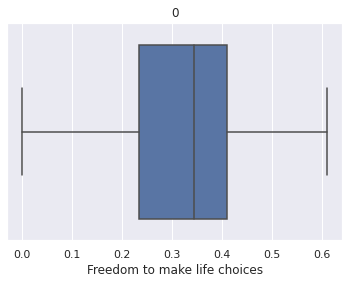

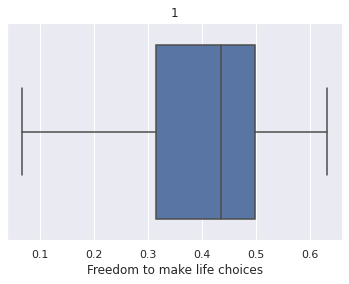

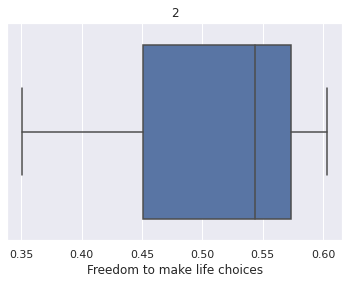

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster


In [ ]:
outliers=boxplot(clustered_2019,"Freedom to make life choices")
outliers

In [ ]:
handling(clustered_2019,outliers,"Freedom to make life choices")

Done
Done
Done


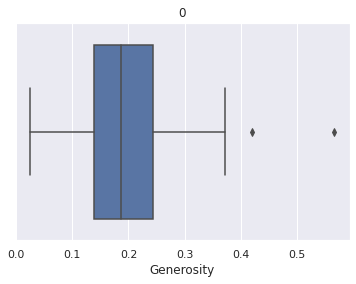

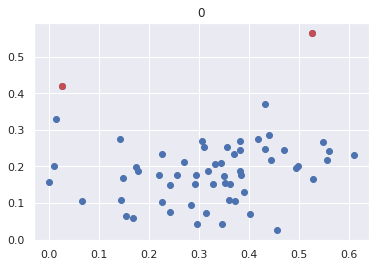

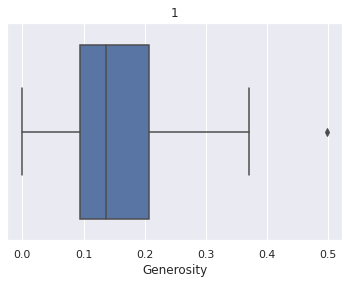

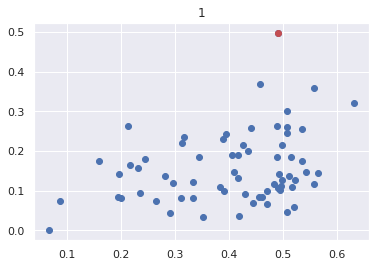

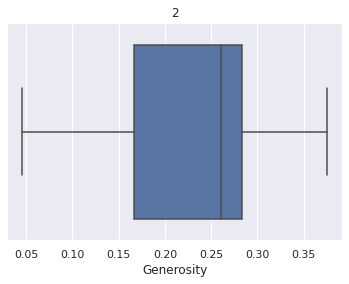

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster
130,131,Myanmar,4.360,0.710,1.181,0.555,0.525,0.566,0.172,0
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110,0
91,92,Indonesia,5.192,0.931,1.203,0.660,0.491,0.498,0.028,1


In [ ]:
outliers=boxplot(clustered_2019,"Generosity")
outliers

In [ ]:
handling(clustered_2019,outliers,"Generosity")

[58]
0.37200000000000005
[57]
0.331
Done
[66]
0.359
Done
Done


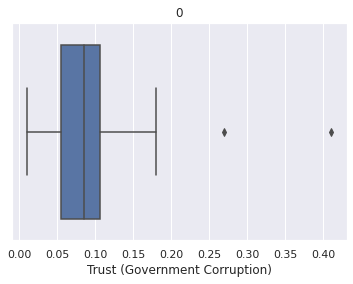

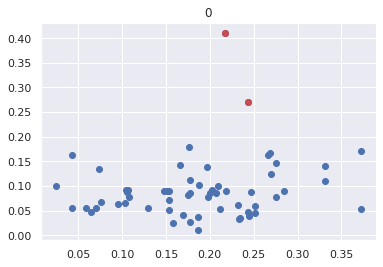

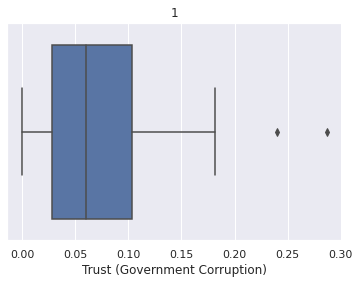

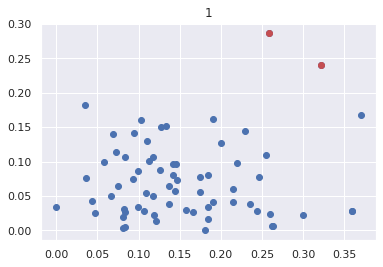

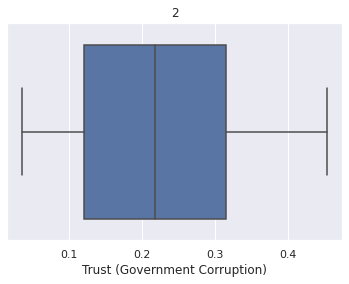

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster
111,112,Somalia,4.668,0.000,0.698,0.268,0.559,0.243,0.270,0
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,0
40,41,Uzbekistan,6.174,0.745,1.529,0.756,0.631,0.322,0.240,1
75,76,Hong Kong,5.430,1.438,1.277,1.042,0.440,0.258,0.287,1


In [ ]:
outliers=boxplot(clustered_2019,"Trust (Government Corruption)")
outliers

In [ ]:
handling(clustered_2019,outliers,"Trust (Government Corruption)")

[57]
[0.18]
[57]
0.172
Done
[65]
[0.182]
[65]
0.16699999999999998
Done
Done


## Exporting the data

In [ ]:
root_path='Cleaned_data/happiness_data_sets/'
clustered_2015.to_csv('2015.csv')
clustered_2016.to_csv('2016.csv')
clustered_2017.to_csv('2017.csv')
clustered_2018.to_csv('2018.csv')
clustered_2019.to_csv('2019.csv')